In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gspec
import numpy as np
import sklearn.preprocessing as prep
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import and Assess

In [2]:
df = pd.read_csv("./data/Dataset.csv", sep=";")
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe(include="all")

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,111733.000000,111733,107561.000000,111733.000000,111733,110732,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
unique,NaN,199,NaN,NaN,107584,103480,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FRA,NaN,NaN,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16516,NaN,NaN,75,3032,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,55867.000000,NaN,45.639191,595.026599,NaN,NaN,60.833147,283.851283,64.682802,0.002282,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,32254.683151,NaN,17.244952,374.657382,NaN,NaN,85.115320,379.131556,123.580715,0.080631,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,1.000000,NaN,-10.000000,36.000000,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27934.000000,NaN,33.000000,288.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55867.000000,NaN,47.000000,522.000000,NaN,NaN,21.000000,208.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83800.000000,NaN,58.000000,889.000000,NaN,NaN,95.000000,393.300000,84.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df.shape

(111733, 29)

In [5]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

# Exploratory Data Analysis

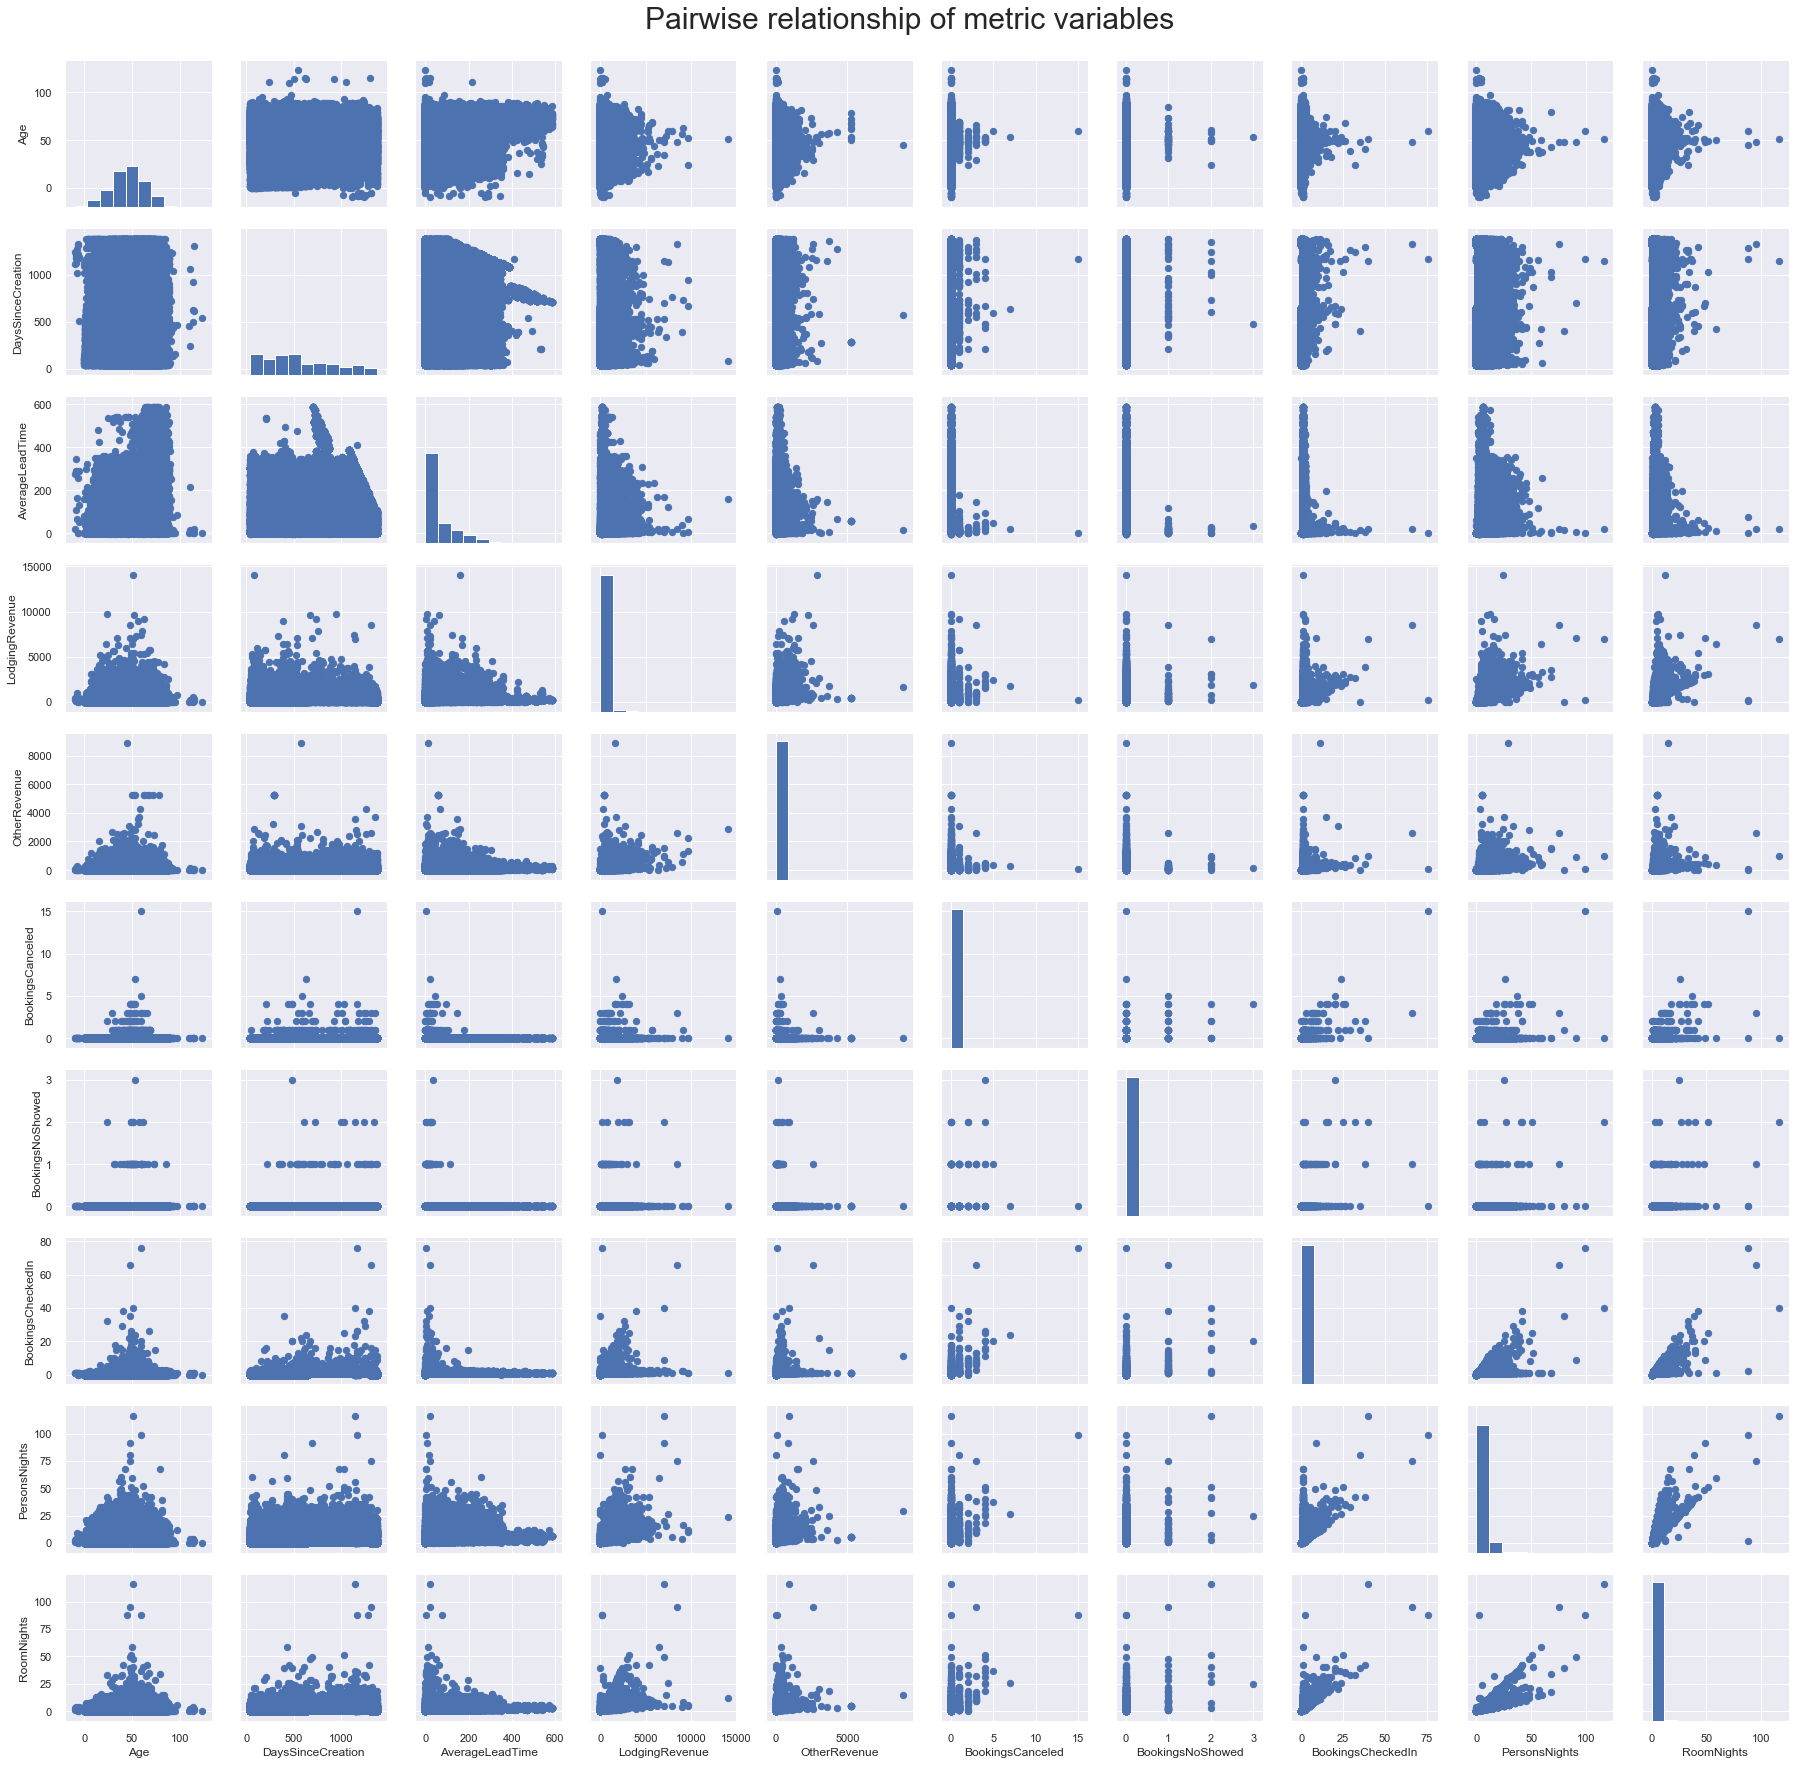

In [6]:
# data
metric_df = df.loc[:, (df.dtypes!="object") & (~df.columns.str.contains("SR"))]

sns.set()

# Setting pairgrid
g = sns.PairGrid(metric_df.drop("ID",1).dropna())

# Populating pairgrid
mdg = g.map_diag(plt.hist)
mog = g.map_offdiag(plt.scatter, s=40)
    
# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=30)

plt.show()

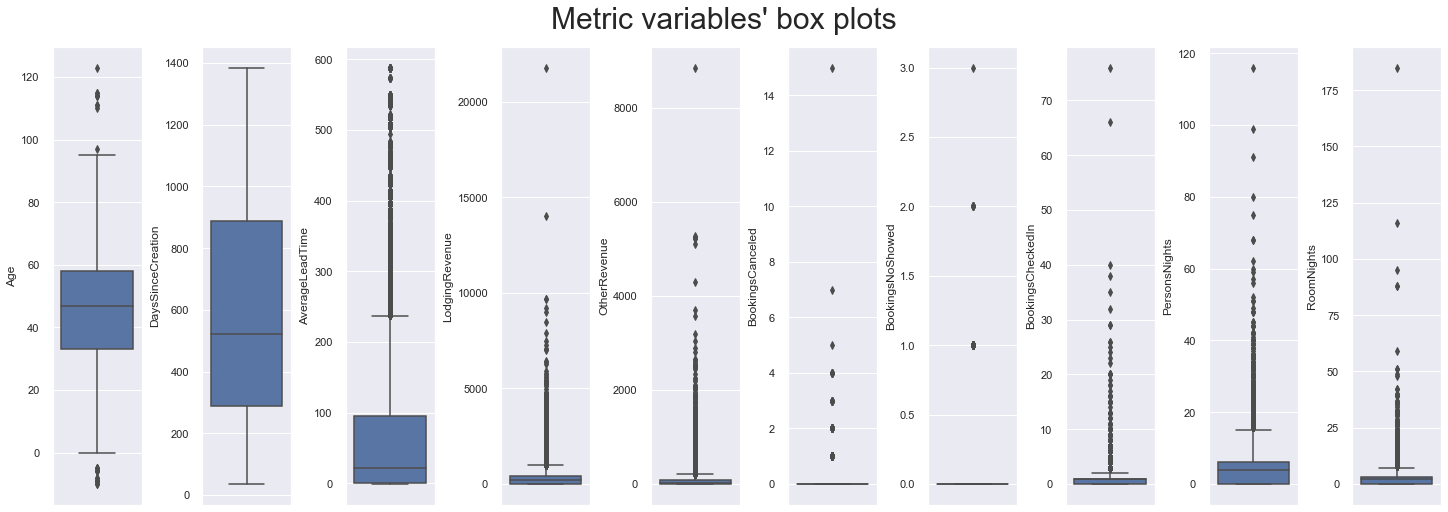

In [7]:
sns.set()

# Features to plot
plot_features = metric_df.columns.drop("ID")

# Prepare figure
fig, axes = plt.subplots(1, len(plot_features), figsize=(20,7), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes, plot_features):
    sns.boxplot(y=f, data=metric_df, ax=ax)

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

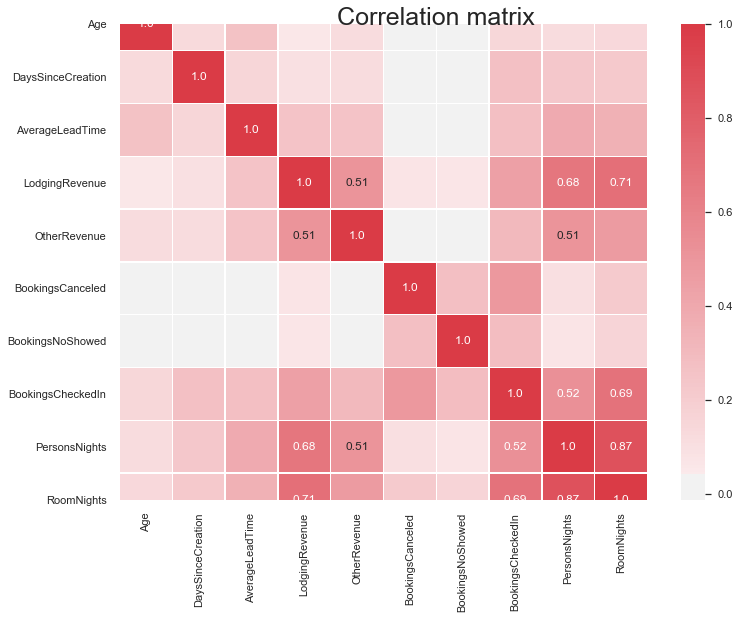

In [8]:
sns.set(style="white")

# Compute the correlation matrix
corr = metric_df.drop("ID",1).corr() #Getting correlation of numerical variables

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
# mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = np.absolute(corr.values)>=0.50 # Annotate correlations above abs(0.7)
annot_arr = np.where(mask_annot, corr.values.round(2), np.full(corr.shape,""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, annot=annot_arr, fmt="s", ax=ax)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=25)
plt.yticks(rotation=0)
# # Fixing the bug of partially cut-off bottom and top cells
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

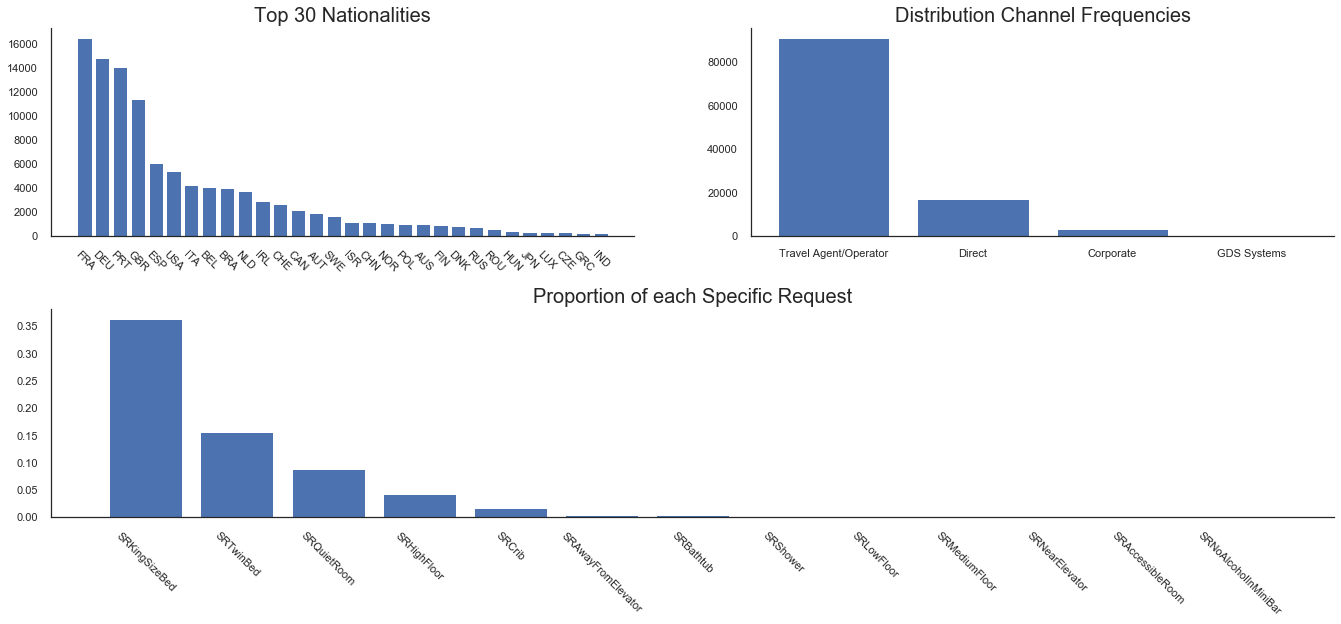

In [24]:
# data
ax1_df = df["Nationality"].value_counts()[:30]
ax2_df = df["DistributionChannel"].value_counts()
ax3_df = pd.melt(df.loc[:,df.columns.str.contains("SR")]).groupby("variable").mean().sort_values("value", ascending=False)["value"]

sns.set()
sns.set_style("white")


# figure
fig = plt.figure(figsize=(23,9))
gs = gspec.GridSpec(2,2) # grid specification
ax1 = fig.add_subplot(gs[0,0]) # First row, first column
ax2 = fig.add_subplot(gs[0,1]) # First row, second column
ax3 = fig.add_subplot(gs[1,:]) # Second row, all columns

# axis
ax1.bar(ax1_df.index, ax1_df.values)
ax2.bar(ax2_df.index, ax2_df.values)
ax3.bar(ax3_df.index, ax3_df.values)

# layout
ax1.set_title("Top 30 Nationalities", fontsize=20)
ax2.set_title("Distribution Channel Frequencies", fontsize=20)
ax3.set_title("Proportion of each Specific Request", fontsize=20)
for tick in ax1.get_xticklabels():
    tick.set_rotation(-45)
for tick in ax3.get_xticklabels():
    tick.set_rotation(-45)
plt.subplots_adjust(hspace=0.35)
sns.despine()
plt.show()

In [26]:
df["Nationality"].value_counts()[:10].cumsum()

FRA    16516
DEU    31321
PRT    45422
GBR    56884
ESP    63007
USA    68416
ITA    72684
BEL    76795
BRA    80832
NLD    84626
Name: Nationality, dtype: int64

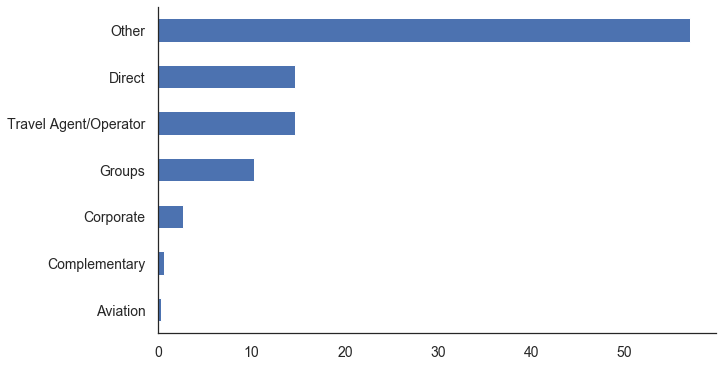

In [10]:
sns.set_style("white")

# figure 
fig = plt.figure(figsize=(10, 6))

# plot
(df["MarketSegment"].value_counts()/df.shape[0]*100).sort_values(ascending=True).plot(kind="barh", fontsize=14)

# layout
sns.despine()

# plt.savefig("old_market_segments.png", format="png", bbox_inches="tight")
plt.show()

# Data Cleaning

## Coherence Checks

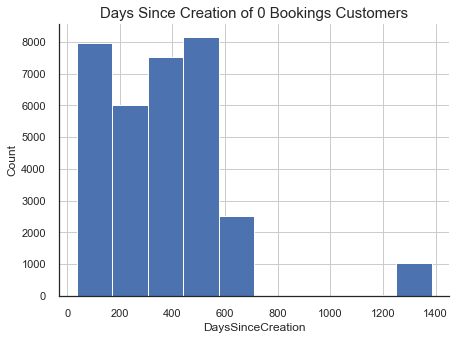

In [29]:
# We believe 0 bookings customer are old customers that were migrated from old system. Also, some of them might have been migrated from acquired hotels' systems.
sns.set()
sns.set_style("white")
fig = plt.figure(figsize=(7,5))
df.loc[((df["BookingsCanceled"]==0) & (df["BookingsNoShowed"]==0) & (df["BookingsCheckedIn"]==0)), "DaysSinceCreation"].hist()
plt.title("Days Since Creation of 0 Bookings Customers", size=15)
plt.ylabel("Count")
plt.xlabel("DaysSinceCreation")
sns.despine()
plt.show()

In [30]:
# Deleting records that have 0 in every booking variable (was registed in the DB but never booked anything)
df_clean = df.loc[~((df["BookingsCanceled"]==0) & (df["BookingsNoShowed"]==0) & (df["BookingsCheckedIn"]==0))]
df_nocheckins = df.loc[(df["BookingsCanceled"]==0) & (df["BookingsNoShowed"]==0) & (df["BookingsCheckedIn"]==0)]
df_clean.shape

(78536, 29)

### Finding accounts from the same Customer

In [31]:
# Duplicated dochash study
a = df_clean[(df_clean.duplicated(subset=['DocIDHash','NameHash'], keep=False))]
a = a[~a.DocIDHash.isnull()]
b=a[a.duplicated(subset=['DocIDHash','NameHash','Nationality'], keep=False)]
c=a[a.duplicated(subset=['DocIDHash','NameHash','Nationality','Age'], keep=False)]
T = b.merge(c, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
T.sort_values(by='DocIDHash').head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,_merge
3778,94299,PRT,65.0,179,0xA9CDF5003C8585074B501911E57B58E505F6E6B1105D...,0x06614628F5F03C639AC1AD6A2C1BFAC7D25396129B72...,0,58.0,21.0,1,...,0,0,0,0,0,0,0,0,0,left_only
674,13326,PRT,45.0,1141,0xA9CDF5003C8585074B501911E57B58E505F6E6B1105D...,0x06614628F5F03C639AC1AD6A2C1BFAC7D25396129B72...,31,0.0,0.0,1,...,0,0,1,1,0,0,0,0,0,left_only
1815,39729,DEU,30.0,721,0xAE4050661026434CEE84C1CB88DD264BD390908013FC...,0x17ED10361077B7502854C0FCCC4A64D68825D61E599C...,517,132.8,148.0,0,...,0,0,0,0,0,0,0,0,0,left_only
1817,39783,DEU,91.0,720,0xAE4050661026434CEE84C1CB88DD264BD390908013FC...,0x17ED10361077B7502854C0FCCC4A64D68825D61E599C...,155,119.0,7.0,0,...,0,0,0,0,0,0,0,0,0,left_only
1264,25590,DEU,114.0,924,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,7,492.0,76.4,0,...,0,0,0,0,0,0,0,0,0,left_only


In [32]:
df_clean["DocIDHash"].value_counts()

0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    2904
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      14
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0x555FA5E42782F6C08F44CD649146E4B82742A688D87358254980DB2494953A25       1
0x03F6F7B61D3F84D3E66FC97093A24512F1EED5B897403337DC861A6220D95E2E       1
0xD0BDA9AB00DE3E611FDC4785107E1A2B76C21D39B381043E65ECCDA770EFDCB0       1
0xAB929152A4B496E1079157D2EFB2285B930CC1DB76974C73F2BE3E46837C74DE       1
0xF47040D9245ECC56602C2B412338C8D7DEBC0223D7DB2E3DB74B2A4DE1D54A81       1
Name: DocIDHash, Length: 72502, dtype: int64

In [33]:
# Replacing DocIDHash NaNs by most frequent hash (probably placeholder for no doc, since they all have diffent characteristics)
df_clean.loc[:, "DocIDHash"].fillna(df_clean["DocIDHash"].mode()[0], inplace=True)

In [34]:
# we considered records from the same person when they share the same Namehash, DocIdHash and Nationality
df_clean.loc[:, "GroupbyId"] = df_clean.loc[:, "NameHash"] + df_clean.loc[:, "DocIDHash"] + df_clean.loc[:, "Nationality"]
df_clean["GroupbyId"].value_counts()

0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922BPRT    20
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD500x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52PRT    15
0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552E3F86410B2B9B91A03500x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003CHE    13
0xCD38FE774A83198829377D15E818F31ED0A00E9320801B25585ABD784E08A18F0x8FA8EB6D044E4F2C691C2091FAB27B92FEFE22122F419975703C3D5BA76AC4A2AUT    10
0x3F7AC57386BCF3165796D2B67A548552CA0B7D387E744A36A6A446D2E09D1FBD0x6B421376B94F3D1722979458A96DF486DEA0F9290CC05E9699F2762FD0DDA71DDNK    10
                                                                                                                                           ..
0xBB9E4E0FA8181B4BE44804DD4A3D20A5719852AB0AEC7A44D9E47E6AB47B64220x898C6974AFB2361211C09D6C121805A94F13FDEE831795126BA44B61B742FE4EUSA     1
0xA615

In [53]:
df_clean.loc[:, "TotalBookings"] = df_clean.loc[:, "BookingsCanceled"] + df_clean.loc[:, "BookingsNoShowed"] + df_clean.loc[:, "BookingsCheckedIn"]
df_clean.loc[:, "TotalLeadTime"] = df_clean.loc[:, "TotalBookings"] * df_clean.loc[:, "AverageLeadTime"]

In [54]:
gb1 = df_clean.loc[:, ["GroupbyId", "TotalBookings", "TotalLeadTime", "LodgingRevenue", "OtherRevenue","BookingsCanceled", "BookingsNoShowed", 
                 "BookingsCheckedIn", "PersonsNights", "RoomNights"]].groupby(by="GroupbyId").sum()
gb2 = df_clean.loc[:, ["GroupbyId", "Age"]].groupby(by="GroupbyId").mean()
gb3 = df_clean.loc[:, ["GroupbyId", "DaysSinceCreation"]].groupby(by="GroupbyId").max() # oldest DaysSinceCreation

# Getting ID, Nationality, NameHash and DocIDHash from oldest registed record from a customer
gb3 = pd.merge(gb3.reset_index(), df_clean[["ID", "Nationality", 'NameHash', 'DocIDHash', "GroupbyId", "DaysSinceCreation"]],
               how="left", on=["GroupbyId", "DaysSinceCreation"])
gb3 = gb3.drop_duplicates(subset=["GroupbyId", "DaysSinceCreation"]).set_index("GroupbyId") # a person might have the same GroupId and DaysSinceCreation

# Getting value of the remaining variables corresponding to the most recent registed account
gb_temp = df_clean.loc[:, ["GroupbyId", "DaysSinceCreation"]].groupby(by="GroupbyId").min() # most recent DaysSinceCreation
gb4 = pd.merge(gb_temp.reset_index(), df_clean[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 
                                  'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
                                  'DistributionChannel', 'MarketSegment', "GroupbyId", "DaysSinceCreation"]],
               how="left", on=["GroupbyId", "DaysSinceCreation"])
gb4 = gb4.drop_duplicates(subset=["GroupbyId", "DaysSinceCreation"]).drop("DaysSinceCreation", axis=1).set_index("GroupbyId") # a person might have the same GroupId and DaysSinceCreation

# concatenate group by dfs
gb_df = pd.concat([gb1, gb2, gb3, gb4], axis=1).reset_index()

# calculate average lead time
gb_df["AverageLeadTime"] = gb_df["TotalLeadTime"] / gb_df["TotalBookings"]

# ordering columns
gb_df = gb_df[df_clean.columns]

# dropping columns
gb_df.drop(["GroupbyId", "TotalLeadTime"], axis=1, inplace=True)

gb_df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalBookings
0,91332,BRA,51.0,205,0x000093906C9FA7A54C937EF1848D4AA5F79F104D8365...,0xFBB48E8A898A0973E8FC147D2AC89307B16EE4D6B618...,41.0,416.66,271.5,0,...,0,0,0,1,0,0,0,0,0,1
1,26632,CHE,25.0,908,0x0000DA6E0C98F2EA5DEE75FE5541A09A2932A0E85102...,0x7DE0876FB3F78A6C3EFB6BF57A9C61B086C4C7DC183B...,66.0,384.00,58.5,0,...,0,0,0,0,0,0,0,0,0,1
2,43208,FRA,39.0,651,0x00025D64CF323C2AA58DBC810B2B08664A7CBC28F989...,0x9035FA078B3BE036893E6CD565F1BEDD5DB562D75B68...,24.0,234.00,28.0,0,...,0,0,0,0,1,0,0,0,1,1
3,49247,DEU,42.0,576,0x00040537EF47B28CFD9E3CA98A75D543FB1A29581449...,0x7EB374B852C8D4583929799B91A6AA9E29213FFCF5D8...,8.0,432.00,21.0,0,...,0,0,0,0,0,0,0,0,0,1
4,7541,FRA,30.0,1230,0x00042DDB786F3CA782D7187AE51310DFEEF6C98BB3F5...,0xA282DFD3EAF426E820EACA6C4F6627A1487D83DBA3EE...,111.0,410.00,112.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76136,30002,AUS,35.0,860,0xFFFDCFF5DF689A85688B1D543E7A932E1EBB459D2885...,0x612B07028BA0C09635ACD3FB059EBA3CA22297CA20CD...,20.0,416.00,56.0,0,...,0,0,0,1,0,0,0,0,0,1
76137,24998,AUT,46.0,934,0xFFFED1F163EE82312A61C02A2E92893BDD526B147963...,0xC92F34F552D82B1781537A7C6456B0AB78B75346DB88...,12.0,366.00,21.0,0,...,0,0,0,0,0,0,0,0,1,1
76138,78827,PRT,NaN,348,0xFFFEF6E2E4F15DE3F04DCC807903CD6DBF51495B46F3...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,244.0,1287.90,354.0,0,...,0,0,0,1,0,0,0,0,0,1
76139,76937,ESP,37.0,363,0xFFFF0AF514527CC4611E44B3503439D53F75BD8677AA...,0xBE97A4BD91B043EEB65F10E8D20F933B9599FCD76B9B...,20.0,615.00,71.5,0,...,0,0,0,0,1,0,0,0,0,1


In [55]:
# We have one customer with 2 cancelations and no check-ins. We will not consider this customer in the analysis.
df_nocheckins = df_nocheckins.append(gb_df.loc[gb_df["BookingsCheckedIn"]==0])
gb_df = gb_df.loc[gb_df["BookingsCheckedIn"]!=0]
df_nocheckins.tail(1)

,Age,AverageLeadTime,BookingsCanceled,BookingsCheckedIn,BookingsNoShowed,DaysSinceCreation,DistributionChannel,DocIDHash,ID,LodgingRevenue,...,SRHighFloor,SRKingSizeBed,SRLowFloor,SRMediumFloor,SRNearElevator,SRNoAlcoholInMiniBar,SRQuietRoom,SRShower,SRTwinBed,TotalBookings
73681,38.0,0.0,2,0,0,599,Direct,0x2C7A2BA2FE12FC4BBA48C1D55789E2BEFC23027F05BD...,47035,0.0,...,0,0,0,0,0,0,0,0,0,2.0


In [56]:
gb_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,76140,NaN,NaN,NaN,47322.1,31787,1,20515.8,39968.5,74430.2,111732
Nationality,76140,185,FRA,11297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,73308,NaN,NaN,NaN,48.0243,15.2744,-10,36,48,58,115
DaysSinceCreation,76140,NaN,NaN,NaN,695.106,376.882,36,382,717,1019,1385
NameHash,76140,75498,0x264D8DC78C198A35ED647032AC1EBEBC70D4BB9F64F2...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,76140,72501,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,2703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,76140,NaN,NaN,NaN,87.958,90.0625,-1,18,59,134,588
LodgingRevenue,76140,NaN,NaN,NaN,416.539,419.093,0,192,316,496,21981
OtherRevenue,76140,NaN,NaN,NaN,94.9197,142.909,0,28,60,116,8859.25
BookingsCanceled,76140,NaN,NaN,NaN,0.00332283,0.124394,0,0,0,0,15


<Figure size 576x396 with 0 Axes>

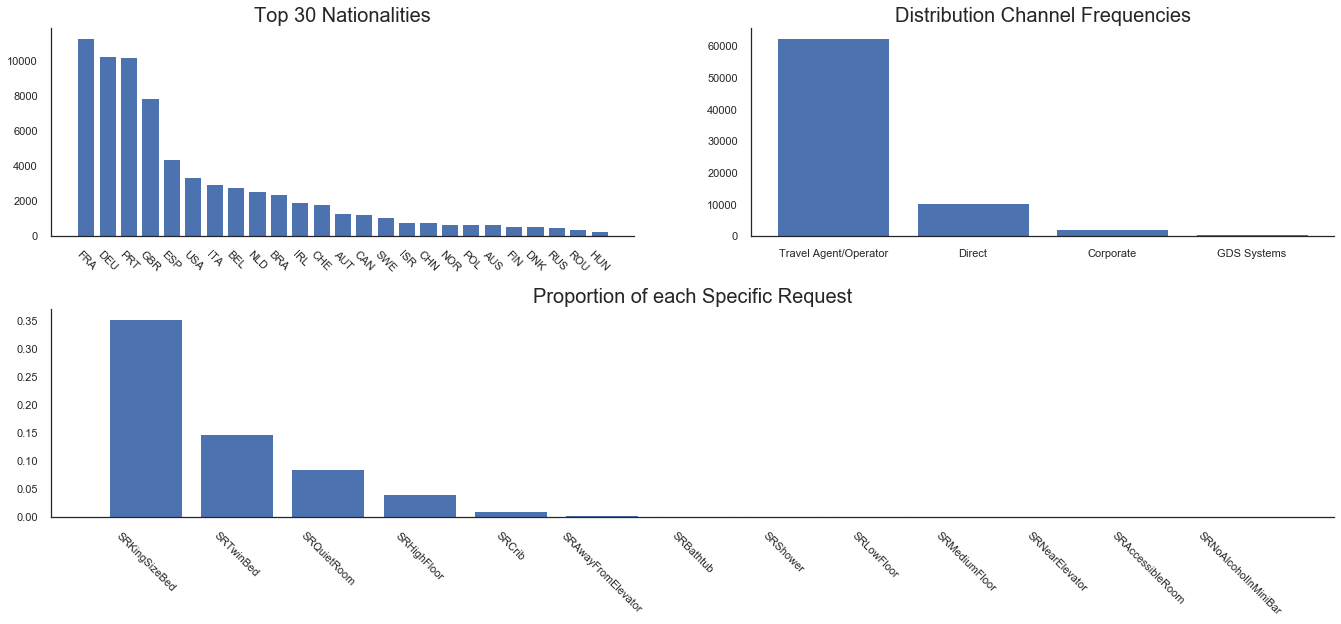

In [57]:
# data
ax1_df = gb_df["Nationality"].value_counts()[:25]
ax2_df = gb_df["DistributionChannel"].value_counts()
ax3_df = pd.melt(gb_df.loc[:,gb_df.columns.str.contains("SR")]).groupby("variable").mean().sort_values("value", ascending=False)["value"]

sns.set()
sns.set_style("white")
sns.despine()

# figure
fig = plt.figure(figsize=(23,9))
gs = gspec.GridSpec(2,2) # grid specification
ax1 = fig.add_subplot(gs[0,0]) # First row, first column
ax2 = fig.add_subplot(gs[0,1]) # First row, second column
ax3 = fig.add_subplot(gs[1,:]) # Second row, all columns

# axis
ax1.bar(ax1_df.index, ax1_df.values)
ax2.bar(ax2_df.index, ax2_df.values)
ax3.bar(ax3_df.index, ax3_df.values)

# layout
ax1.set_title("Top 30 Nationalities", fontsize=20)
ax2.set_title("Distribution Channel Frequencies", fontsize=20)
ax3.set_title("Proportion of each Specific Request", fontsize=20)
for tick in ax1.get_xticklabels():
    tick.set_rotation(-45)
for tick in ax3.get_xticklabels():
    tick.set_rotation(-45)
plt.subplots_adjust(hspace=0.35)
sns.despine()
plt.show()

In [58]:
gb_df["Nationality"].value_counts()[:35].cumsum()

FRA    11297
DEU    21588
PRT    31777
GBR    39644
ESP    44062
USA    47409
ITA    50398
BEL    53180
NLD    55743
BRA    58139
IRL    60068
CHE    61924
AUT    63229
CAN    64489
SWE    65598
ISR    66384
CHN    67161
NOR    67869
POL    68572
AUS    69236
FIN    69802
DNK    70366
RUS    70863
ROU    71281
HUN    71556
JPN    71804
CZE    72028
LUX    72241
GRC    72440
TUR    72621
IND    72791
ARG    72953
KOR    73114
AGO    73274
MEX    73430
Name: Nationality, dtype: int64

In [59]:
# Is there any customer who hasn't checked in and has values different from 0 in the other variables?
gb_df.loc[(gb_df["BookingsCheckedIn"]==0) & 
          ((gb_df["AverageLeadTime"]!=0) | (gb_df["LodgingRevenue"]!=0) | (gb_df["OtherRevenue"]!=0) | (gb_df["BookingsCanceled"]!=0) | 
           (gb_df["BookingsNoShowed"]!=0) | (gb_df["BookingsCheckedIn"]!=0) | (gb_df["PersonsNights"]!=0))]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalBookings


In [60]:
# Is there any customer who has no persons spending the night but has values different from 0 in the other variables?
df_specialcases = gb_df.loc[(gb_df["PersonsNights"]==0) &
                            ((gb_df["AverageLeadTime"]!=0) | (gb_df["LodgingRevenue"]!=0) | (gb_df["OtherRevenue"]!=0) | 
                             (gb_df["BookingsNoShowed"]!=0) | (gb_df["BookingsCheckedIn"]!=0) | (gb_df["PersonsNights"]!=0))]

gb_df = gb_df.loc[~gb_df["ID"].isin(df_specialcases["ID"])]
df_specialcases

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalBookings
1645,80037,BRA,35.0,336,0x0596170AE19299CB3CEBA98BC2FAF9BF5333031C6A32...,0x8186236B5A280E296DC622D0B419BBEBB5BC8E1D4338...,63.0,242.0,24.0,0,...,0,0,1,1,0,0,0,0,0,1
30331,43674,NLD,33.0,641,0x65E5986F79B75C8A171FEEA2E534AAD806D5ACB083D6...,0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...,41.0,267.0,109.0,0,...,0,0,0,0,1,0,0,0,0,1
75111,90375,DEU,52.0,214,0xFC913F891030DD576FDA085E7859D44AB7EE8B000D59...,0x050B3FEBB73D2924810D9C068846F14550B03BCFDC7C...,36.0,2514.0,103.5,0,...,0,0,0,0,0,0,0,0,0,1


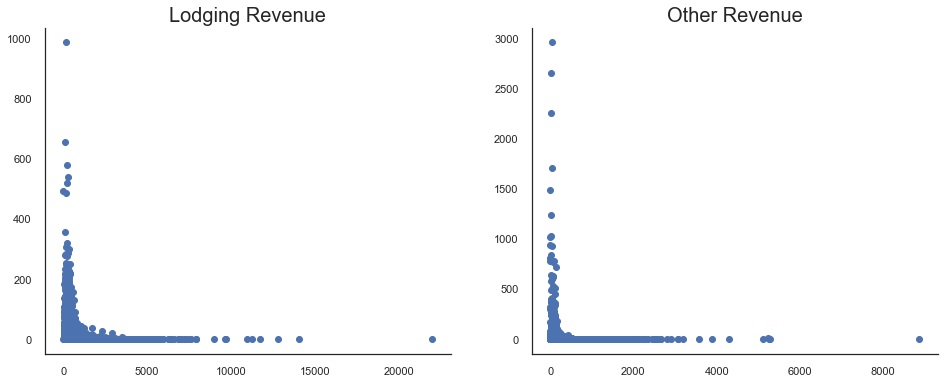

In [61]:
# First Revenue study

sns.set()
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.scatter(gb_df["LodgingRevenue"].value_counts().index, gb_df["LodgingRevenue"].value_counts().values)
ax2.scatter(gb_df["OtherRevenue"].value_counts().index, gb_df["OtherRevenue"].value_counts().values)
ax1.set_title("Lodging Revenue", fontsize=20)
ax2.set_title("Other Revenue", fontsize=20)
sns.despine()
plt.show()

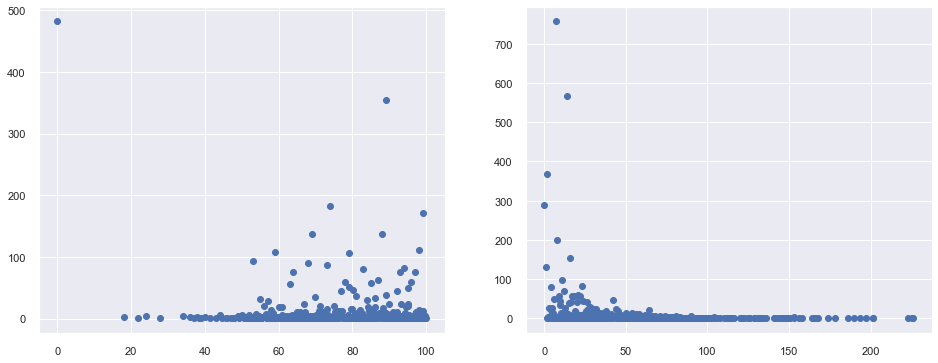

In [62]:
# Revenue study. what is the low revenue value cut-off?
a = gb_df.loc[(gb_df["LodgingRevenue"]<100) & (gb_df["OtherRevenue"]<250)]
sns.set()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.scatter(a["LodgingRevenue"].value_counts().index, a["LodgingRevenue"].value_counts().values)
ax2.scatter(a["OtherRevenue"].value_counts().index, a["OtherRevenue"].value_counts().values)
plt.show()

In [63]:
# Excluding customers that didn't spend anything in the hotel
df_norevenue = gb_df.loc[(gb_df["LodgingRevenue"]==0) & (gb_df["OtherRevenue"]==0)]
gb_df = gb_df.loc[~gb_df["ID"].isin(df_norevenue["ID"])]

In [64]:
gb_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,75852,NaN,NaN,NaN,47322.5,31785.8,1,20529.8,39956.5,74389.5,111732
Nationality,75852,185,FRA,11286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,73098,NaN,NaN,NaN,48.0396,15.2777,-10,36,48,58,115
DaysSinceCreation,75852,NaN,NaN,NaN,695.079,376.838,36,382,717,1019,1385
NameHash,75852,75221,0x264D8DC78C198A35ED647032AC1EBEBC70D4BB9F64F2...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,75852,72314,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,2628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,75852,NaN,NaN,NaN,88.1526,90.0329,-1,18,59,134,588
LodgingRevenue,75852,NaN,NaN,NaN,418.081,419.038,0,194,317.5,496.412,21981
OtherRevenue,75852,NaN,NaN,NaN,95.277,143.062,0,28,60,116.5,8859.25
BookingsCanceled,75852,NaN,NaN,NaN,0.00320361,0.123677,0,0,0,0,15


In [65]:
# we will replace -1 AverageLeadTime values for 0 as these may represent corrections or after-check-in received reservations (e.g. at the door hotel booking reservation)
gb_df.loc[gb_df["AverageLeadTime"]<0, "AverageLeadTime"] = 0

In [66]:
# We realised there are customers with age below 18 and some money spent. We believe this age might be incorrect,
# but client informed us they are ok.

# We removed ages below 0 and imputed them , since they were clearly a mistake
gb_df.loc[gb_df["Age"]<0, "Age"] = np.nan

In [67]:
gb_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,75852,NaN,NaN,NaN,47322.5,31785.8,1,20529.8,39956.5,74389.5,111732
Nationality,75852,185,FRA,11286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,73086,NaN,NaN,NaN,48.0488,15.2622,0,36,48,58,115
DaysSinceCreation,75852,NaN,NaN,NaN,695.079,376.838,36,382,717,1019,1385
NameHash,75852,75221,0x264D8DC78C198A35ED647032AC1EBEBC70D4BB9F64F2...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,75852,72314,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,2628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,75852,NaN,NaN,NaN,88.1527,90.0328,0,18,59,134,588
LodgingRevenue,75852,NaN,NaN,NaN,418.081,419.038,0,194,317.5,496.412,21981
OtherRevenue,75852,NaN,NaN,NaN,95.277,143.062,0,28,60,116.5,8859.25
BookingsCanceled,75852,NaN,NaN,NaN,0.00320361,0.123677,0,0,0,0,15


## Feature Engineering

In [68]:
region_table = pd.read_csv("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv")
region_table.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [69]:
# merging region information to gb_df
gb_df = gb_df.merge(region_table[["alpha-3", "name", "region", "sub-region"]], left_on="Nationality", right_on="alpha-3").drop("alpha-3", axis=1)

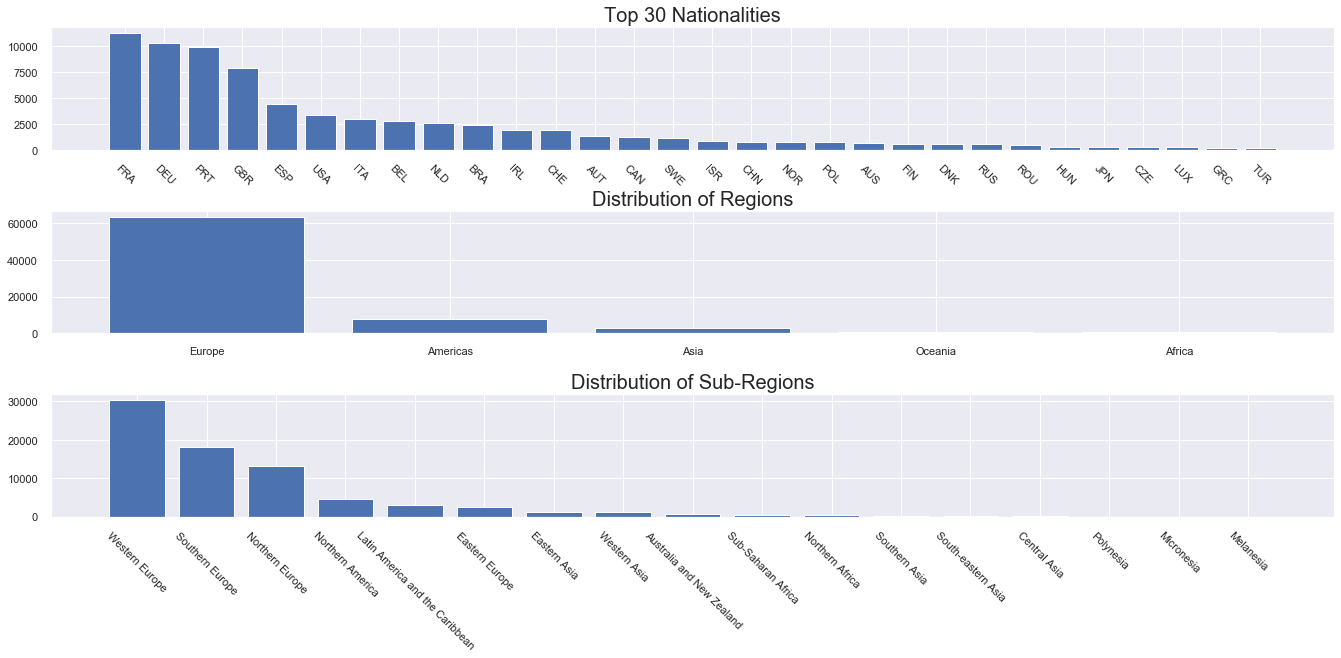

In [70]:
# data
ax1_df = gb_df["Nationality"].value_counts()[:30]
ax2_df = gb_df["region"].value_counts()
ax3_df = gb_df["sub-region"].value_counts()

sns.set()

# figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(23,9))
# gs = gspec.GridSpec(2,2) # grid specification
# ax1 = fig.add_subplot(gs[0,0]) # First row, first column
# ax2 = fig.add_subplot(gs[0,1]) # First row, second column

# axis
ax1.bar(ax1_df.index, ax1_df.values)
ax2.bar(ax2_df.index, ax2_df.values)
ax3.bar(ax3_df.index, ax3_df.values)

# layout
ax1.set_title("Top 30 Nationalities", fontsize=20)
ax2.set_title("Distribution of Regions", fontsize=20)
ax3.set_title("Distribution of Sub-Regions", fontsize=20)
for tick in ax1.get_xticklabels():
    tick.set_rotation(-45)
plt.subplots_adjust(hspace=0.35)
for tick in ax3.get_xticklabels():
    tick.set_rotation(-45)
plt.subplots_adjust(hspace=0.5)

plt.show()

In [71]:
(gb_df["BookingsNoShowed"]>0).value_counts()

False    75802
True        49
Name: BookingsNoShowed, dtype: int64

In [72]:
(gb_df["BookingsCanceled"]>0).value_counts()

False    75720
True       131
Name: BookingsCanceled, dtype: int64

In [73]:
# Total Revenue
gb_df["TotalRevenue"] = gb_df["LodgingRevenue"] + gb_df["OtherRevenue"]
# Relativize BookingsCheckedIn
gb_df["RTotalRevenueCheckedIn"] = gb_df["TotalRevenue"] / gb_df["BookingsCheckedIn"]
gb_df["RLodgingRevenueCheckedIn"] = gb_df["LodgingRevenue"] / gb_df["BookingsCheckedIn"]
gb_df["ROtherRevenueCheckedIn"] = gb_df["OtherRevenue"] / gb_df["BookingsCheckedIn"]
# Relativize PersonsNights
gb_df["RTotalRevenuePNights"] = gb_df["TotalRevenue"] / gb_df["PersonsNights"]
gb_df["RLodgingRevenuePNights"] = gb_df["LodgingRevenue"] / gb_df["PersonsNights"]
gb_df["ROtherRevenuePNights"] = gb_df["OtherRevenue"] / gb_df["PersonsNights"]
# Relativize RoomsNights
gb_df["RTotalRevenueRNights"] = gb_df["TotalRevenue"] / gb_df["RoomNights"]
gb_df["RLodgingRevenueRNights"] = gb_df["LodgingRevenue"] / gb_df["RoomNights"]
# gb_df["ROtherRevenueRNights"] = gb_df["OtherRevenue"] / gb_df["RoomNights"] # Makes no sense
# Relativize DaysSinceCreation
gb_df["RTotalRevenueDSC"] = gb_df["TotalRevenue"] / (gb_df["DaysSinceCreation"]**0.5) # square root to penalize less the persons that are with us for a long time
gb_df["RLodgingRevenueDSC"] = gb_df["LodgingRevenue"] / (gb_df["DaysSinceCreation"]**0.5)
gb_df["ROtherRevenueDSC"] = gb_df["OtherRevenue"] / (gb_df["DaysSinceCreation"]**0.5)
# Concatenating SRs
gb_df["NSRFloor"] = gb_df[["SRHighFloor", "SRLowFloor", "SRMediumFloor"]].apply(lambda x: x.any(), axis=1).astype("float")
gb_df["NSRRoomLocation"] = gb_df[["SRAccessibleRoom", "SRNearElevator", "SRAwayFromElevator", "SRQuietRoom"]].apply(lambda x: x.any(), axis=1).astype("float")
gb_df["NSRInRoom"] = gb_df[["SRBathtub", "SRShower", "SRCrib", "SRNoAlcoholInMiniBar"]].apply(lambda x: x.any(), axis=1).astype("float")
# Correcting Nationality high cardinality
templist = gb_df["Nationality"].value_counts().index[gb_df["Nationality"].value_counts()>1500]

def func(x):
    if x["Nationality"] in templist:
        return x["Nationality"]
    elif x["region"] == "Europe":
        return "Rest of Europe"
    else:
        return "Rest of World"
        
gb_df["NNationality"] = gb_df.apply(func, axis=1)
# Canceled or NoShowed binary
gb_df["RBookingsNoCheckedIn"] = gb_df.apply(lambda x: (x["BookingsNoShowed"] + x["BookingsCanceled"]) / x["TotalBookings"], axis=1)
gb_df.drop(["BookingsNoShowed", "BookingsCanceled"], axis=1, inplace=True)

In [74]:
gb_df.rename(columns={"SRKingSizeBed": "NSRKingSizeBed", "SRTwinBed": "NSRTwinBed"}, inplace=True)

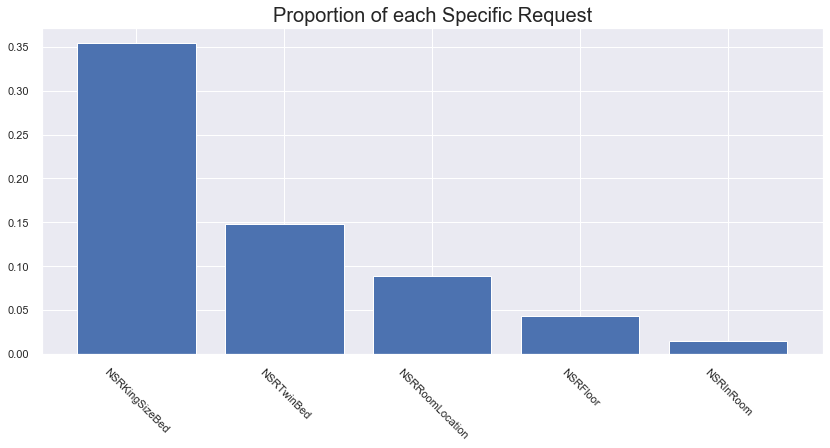

In [75]:
# data
ax_df = gb_df.loc[:,gb_df.columns.str.contains("NSR")].melt().groupby("variable").mean().sort_values("value", ascending=False)["value"]

#figure
fig, ax = plt.subplots(figsize=(14,6))

# axis
ax.bar(ax_df.index, ax_df.values)

# layout
ax.set_title("Proportion of each Specific Request", fontsize=20)
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
plt.subplots_adjust(hspace=0.35)

## Outliers

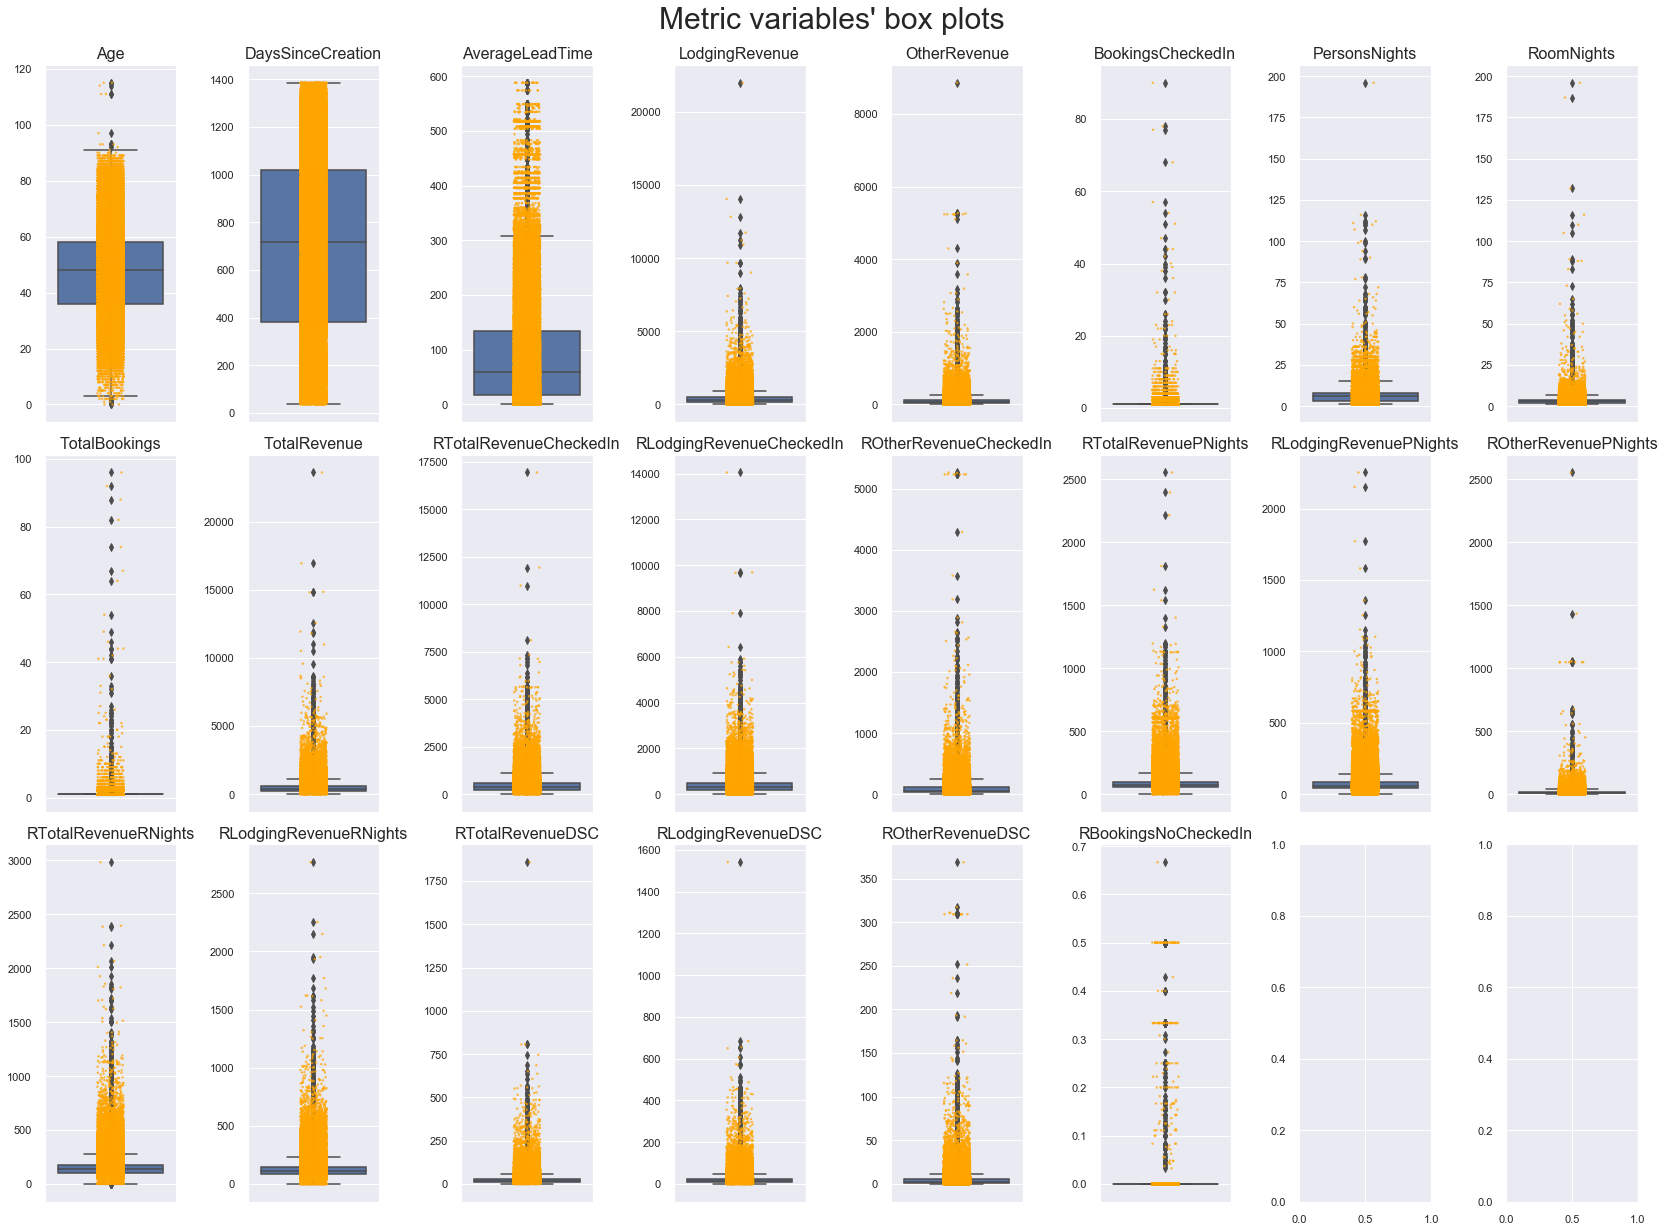

In [76]:
sns.set()

# Features to plot
plot_df = gb_df.loc[:, ~gb_df.columns.str.contains("SR")].select_dtypes(include="number").drop(["ID"], axis=1)

# Prepare figure
fig, axes = plt.subplots(3, 8, figsize=(23, 17), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, plot_df.columns):
    sns.boxplot(y=f, data=plot_df, ax=ax)
    sns.stripplot(y=f, data=plot_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax)
    ax.set_title(f, size=16) # even because of aleasing
    ax.set_ylabel("")

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

In [77]:
# Removing visual outliers
out_mask = ((gb_df["LodgingRevenue"]>20000) | (gb_df["OtherRevenue"]>8000) | (gb_df["PersonsNights"]>175) | 
          (gb_df["RoomNights"]>175) | (gb_df["TotalRevenue"]>20000) | (gb_df["RTotalRevenueCheckedIn"]>15000) | 
          (gb_df["RLodgingRevenueCheckedIn"]>13000) | (gb_df["ROtherRevenuePNights"]>2500) | (gb_df["RTotalRevenueDSC"]>1750)|
          (gb_df["RLodgingRevenueDSC"]>1400))
outlier_df = gb_df.loc[out_mask]
outlier_df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,...,RTotalRevenueRNights,RLodgingRevenueRNights,RTotalRevenueDSC,RLodgingRevenueDSC,ROtherRevenueDSC,NSRFloor,NSRRoomLocation,NSRInRoom,NNationality,RBookingsNoCheckedIn
48233,2757,PRT,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,55.516129,21981.00,1616.00,30,...,126.187166,117.545455,650.719642,606.156225,44.563417,0.0,0.0,0.0,PRT,0.032258
51614,41476,PRT,51.0,693,0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A9...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,26.806818,12819.85,2025.20,78,...,75.740051,65.407398,563.916819,486.985832,76.930986,0.0,0.0,0.0,PRT,0.113636
52945,49184,PRT,45.0,577,0xAF273F4668BB4AF794C0098226948A5ADFE6E67A1A34...,0x4980A1CFF4F6AAA5846A3FC49F5EC0ED7C965C989E35...,14.000000,1649.50,8859.25,11,...,700.583333,109.966667,437.484987,68.669584,368.815403,0.0,0.0,0.0,PRT,0.000000
54638,2843,PRT,NaN,1314,0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,8.000000,0.00,5105.50,3,...,425.458333,0.000000,140.844729,0.000000,140.844729,0.0,0.0,0.0,PRT,0.000000
69800,105702,DNK,51.0,83,0x9AC9D968FD7FED7A9AF8C5763BCAE6D8CC64882D70E9...,0x2A6FECFD6B318B51F4F36EED34DB84A319E2FDBEFDE6...,160.000000,14044.80,2891.50,1,...,1411.358333,1170.400000,1859.000436,1541.617079,317.383358,0.0,0.0,0.0,Rest of Europe,0.000000


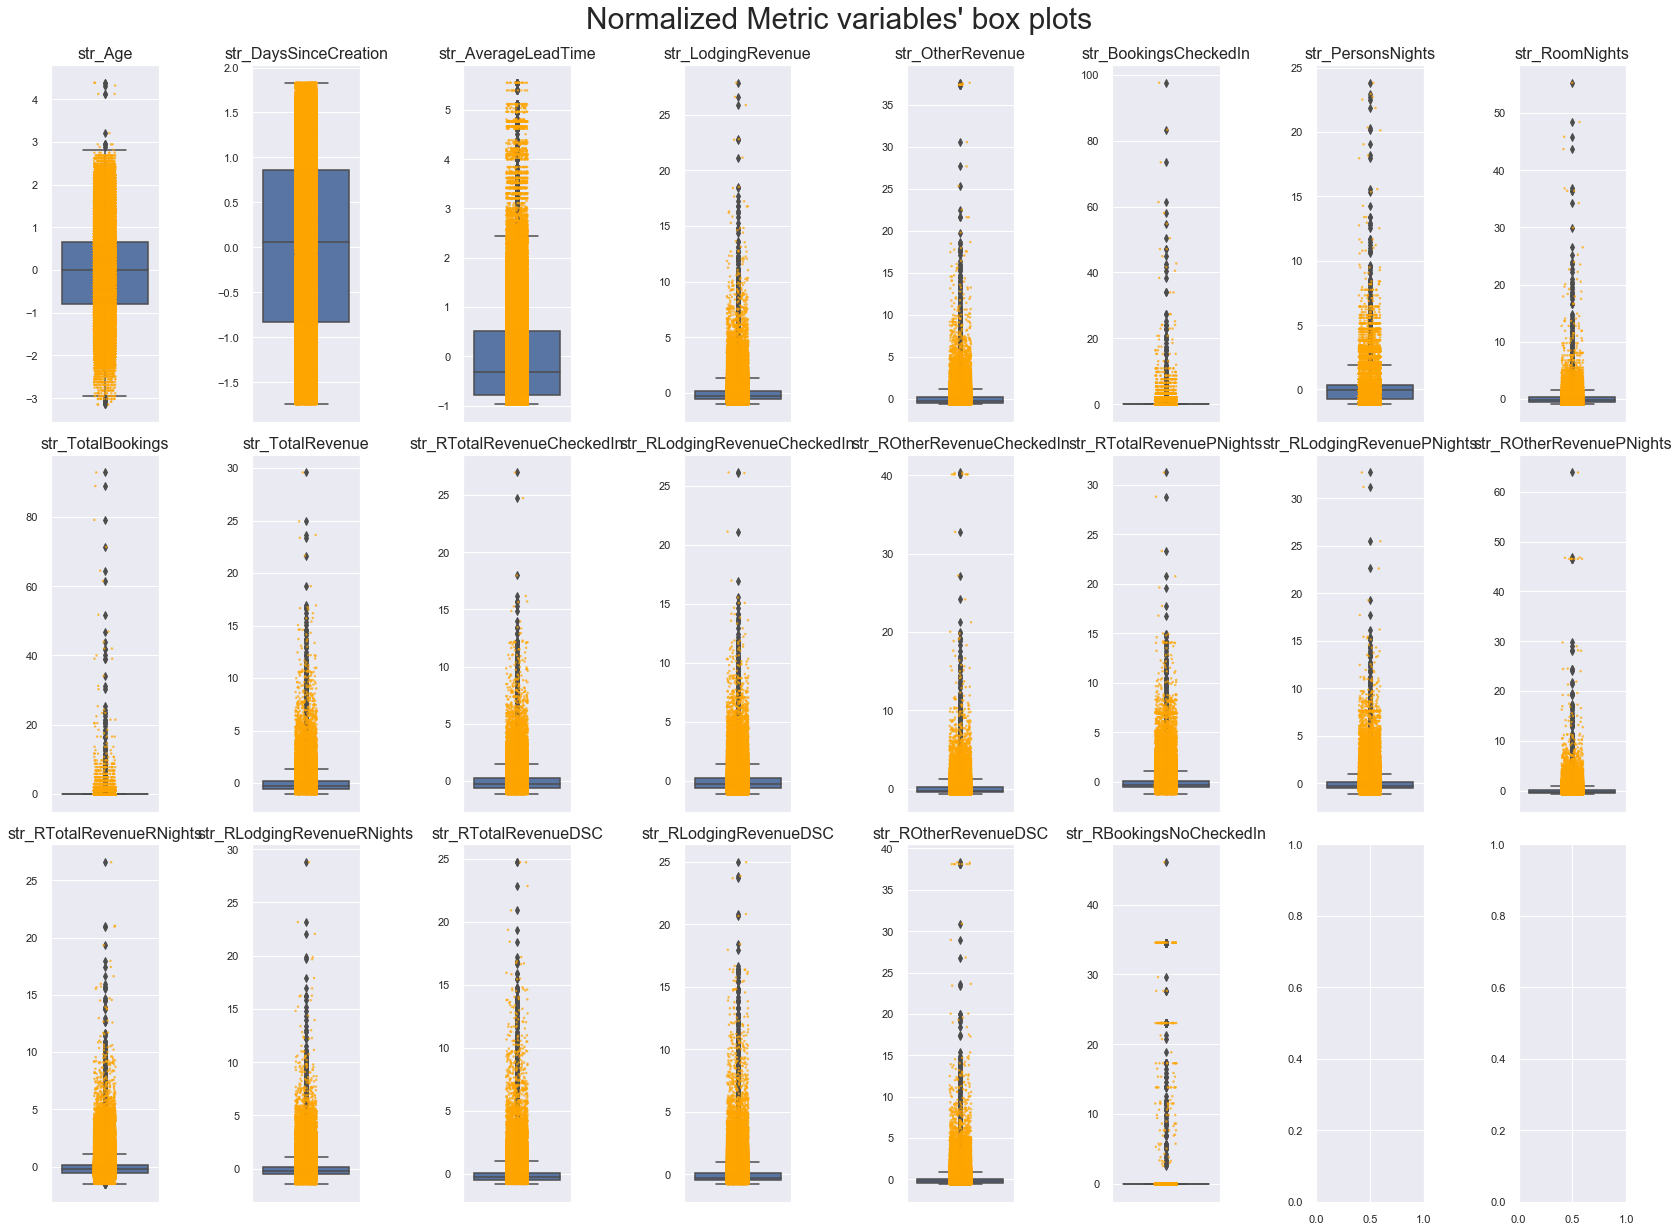

In [78]:
sns.set()

# Filtering out visual outliers
gb_df = gb_df.loc[~out_mask]

# Features to plot
std = prep.StandardScaler()
plot_df = gb_df.loc[:, ~gb_df.columns.str.contains("SR")].select_dtypes(include="number").drop(["ID"], axis=1)
std_plot_df = pd.DataFrame(std.fit_transform(plot_df), index=plot_df.index, columns=map(lambda x: "str_" + x, plot_df.columns))

# Prepare figure
fig, axes = plt.subplots(3, 8, figsize=(23, 17), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, std_plot_df.columns):
    sns.boxplot(y=f, data=std_plot_df, ax=ax)
    sns.stripplot(y=f, data=std_plot_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax)
    ax.set_title(f, size=16) # even because of aleasing
    ax.set_ylabel("")

# Layout
plt.suptitle("Normalized Metric variables' box plots", fontsize=30)

plt.show()

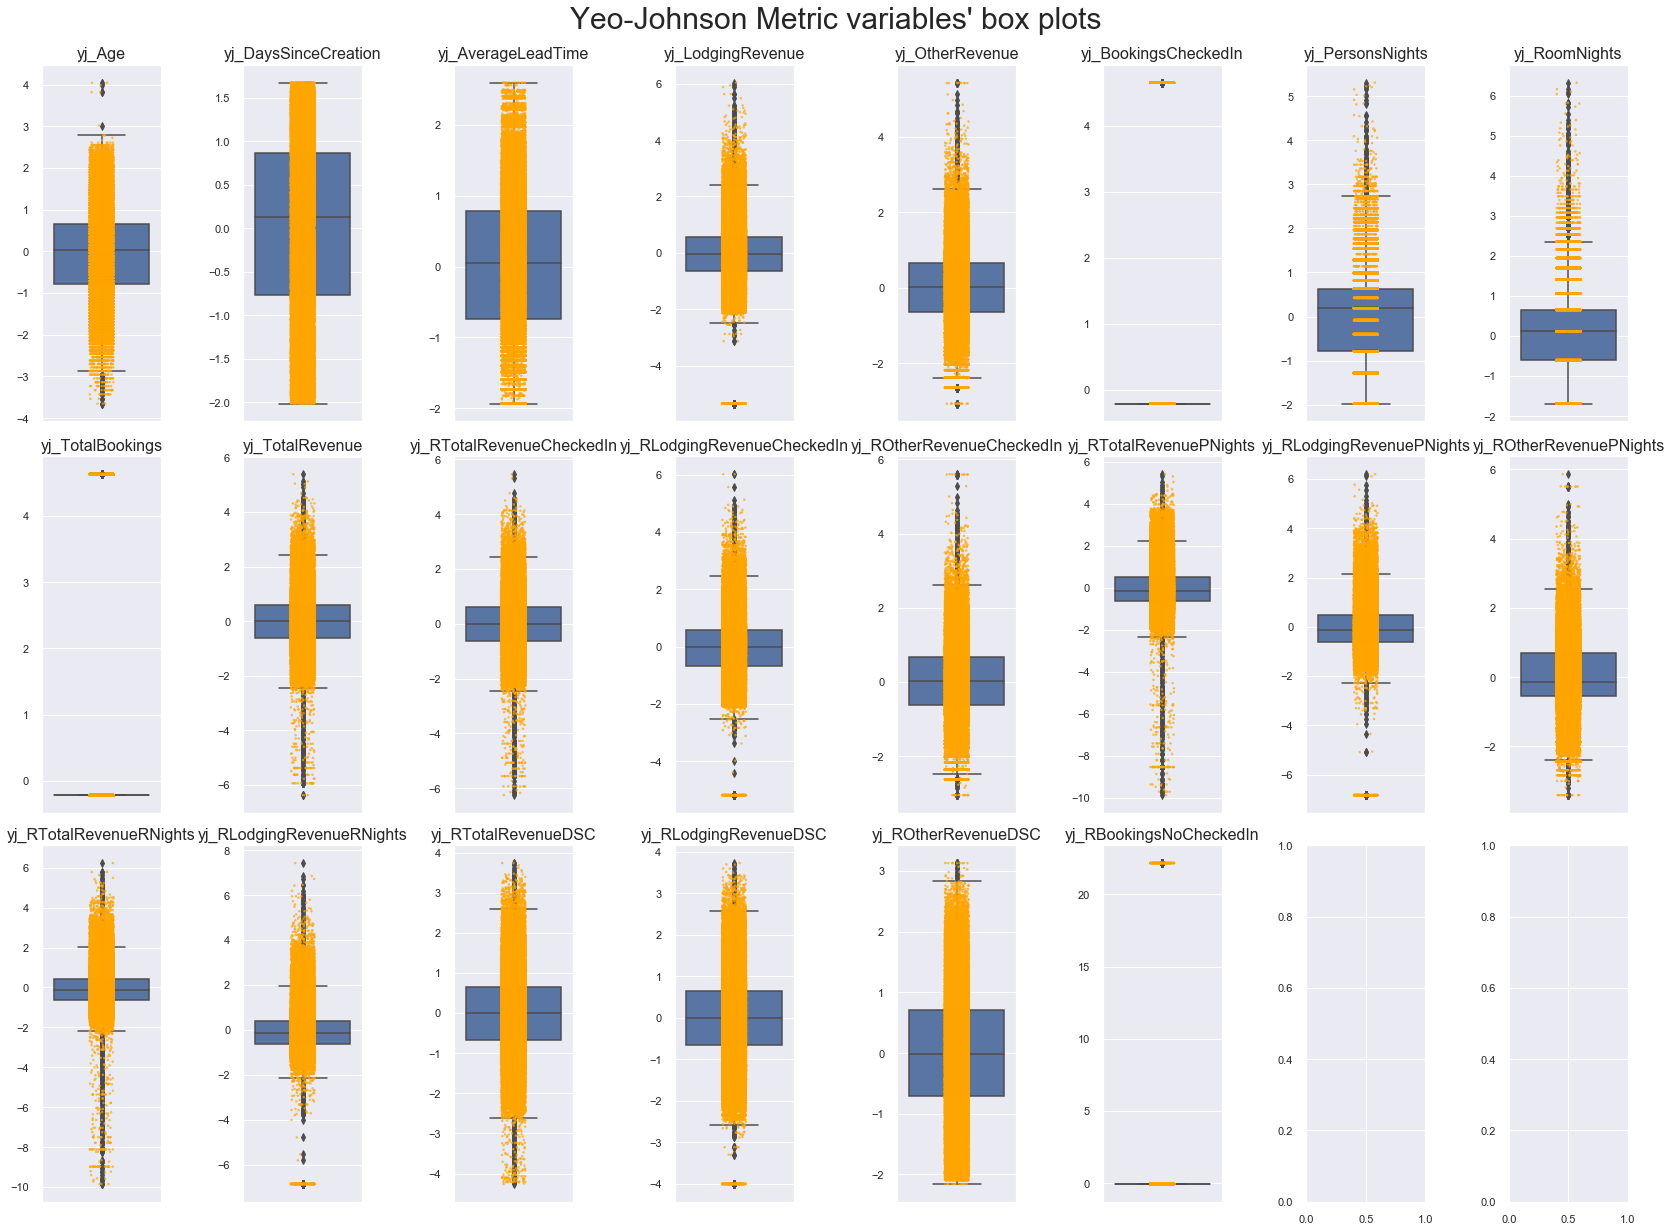

In [79]:
# Yeo-Johnson Transformation
data = gb_df.loc[:, ~gb_df.columns.str.contains("SR")].select_dtypes(include="number").drop(["ID"], axis=1)
yj = prep.PowerTransformer(method='yeo-johnson')
X_trans_yj = yj.fit_transform(data)

# Creating DataFrame
trans_df = pd.DataFrame(X_trans_yj, columns=map(lambda x: "yj_" + x, data.columns.to_list()), index=data.index)

sns.set()

# Prepare figure
fig, axes = plt.subplots(3, 8, figsize=(23, 17), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, trans_df.columns):
    sns.boxplot(y=f, data=trans_df, ax=ax)
    sns.stripplot(y=f, data=trans_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax)
    ax.set_title(f, size=16) # even because of aleasing
    ax.set_ylabel("")

# Layout
plt.suptitle("Yeo-Johnson Metric variables' box plots", fontsize=30)

plt.show()

In [80]:
def out_std(data, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

In [81]:
# std outlier detection
out_mask2 = out_std(trans_df, 5) # .drop(["yj_TotalBookings", "yj_RBookingsNoCheckedIn"], axis=1)
out_mask2.value_counts() / trans_df.shape[0]

False    0.994739
True     0.005261
dtype: float64

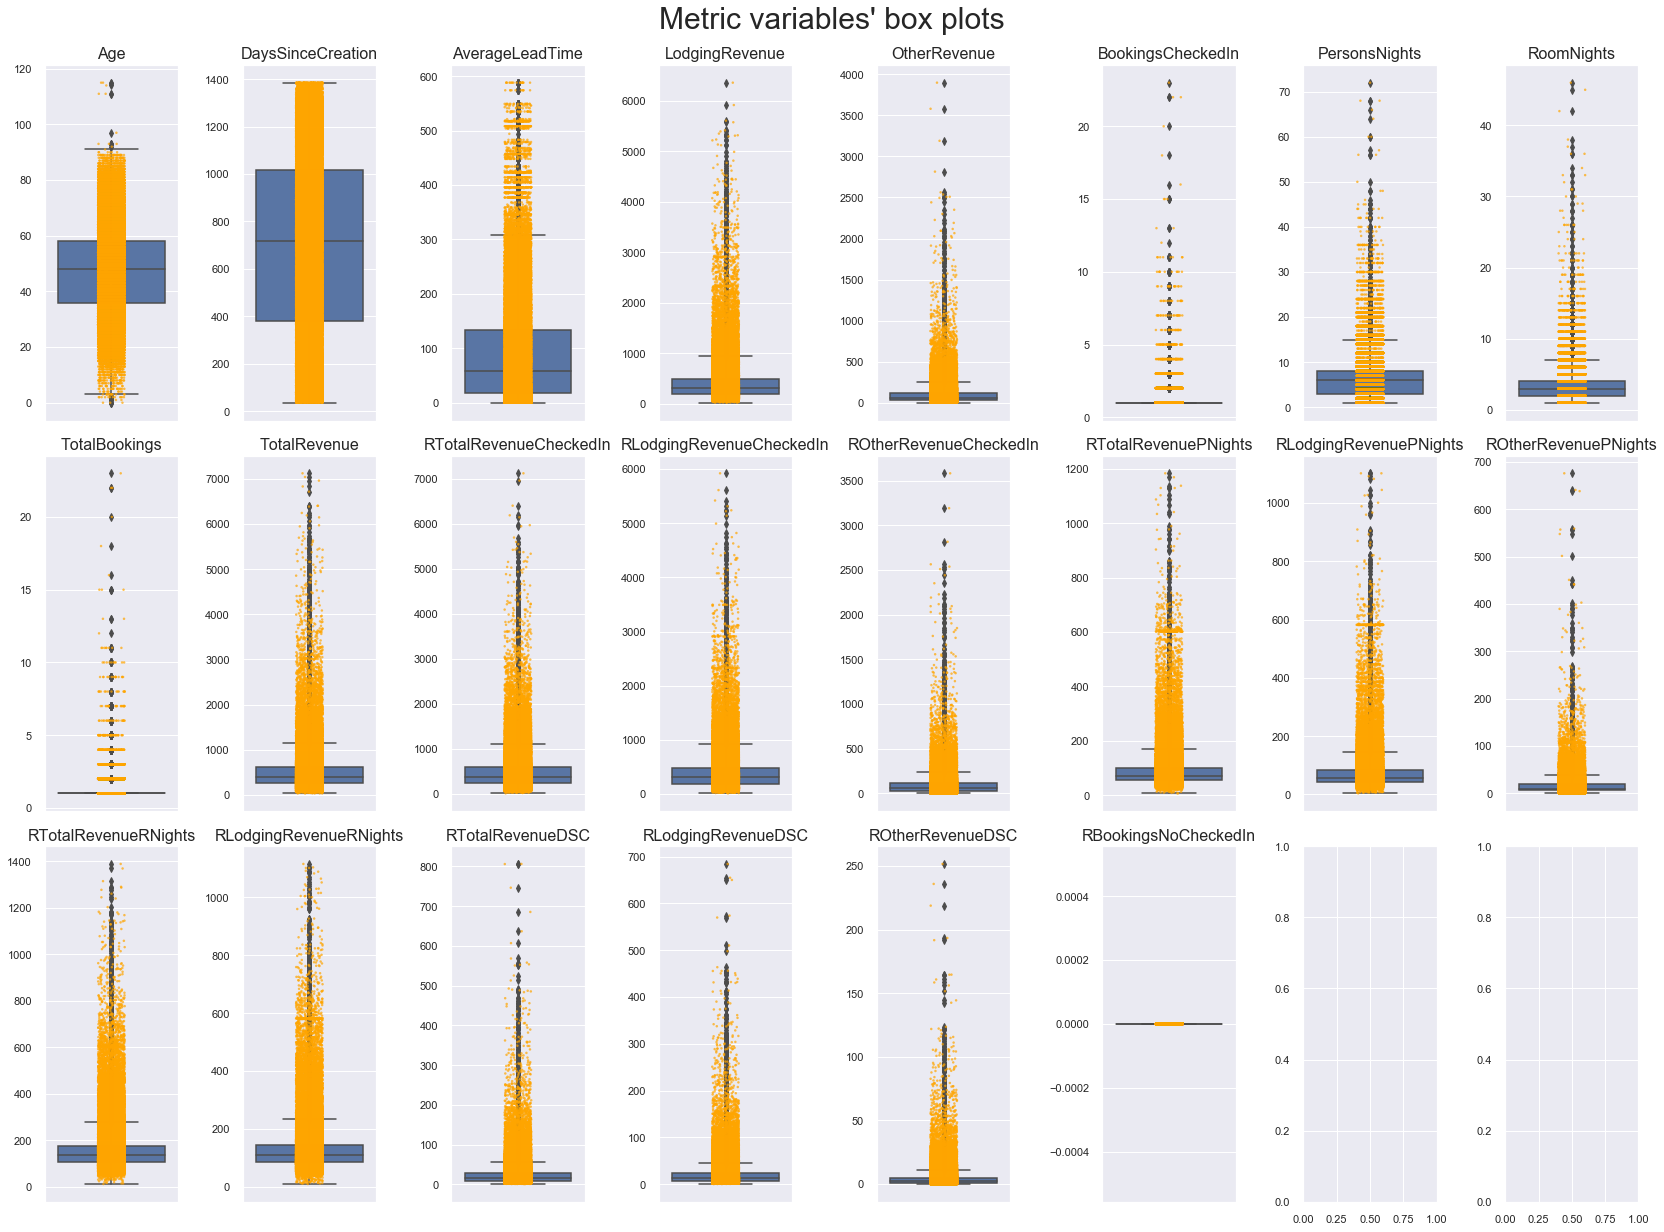

In [82]:
sns.set()

# Features to plot
plot_df = gb_df.loc[~out_mask2, ~gb_df.columns.str.contains("SR")].select_dtypes(include="number").drop(["ID"], axis=1)

# Prepare figure
fig, axes = plt.subplots(3, 8, figsize=(23, 17), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, plot_df.columns):
    sns.boxplot(y=f, data=plot_df, ax=ax)
    sns.stripplot(y=f, data=plot_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax)
    ax.set_title(f, size=16) # even because of aleasing
    ax.set_ylabel("")

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

In [83]:
# Filtering out Final outliers
outlier_df = pd.concat([outlier_df, gb_df.loc[out_mask2 | gb_df["BookingsCheckedIn"]>5]]) # we also decided to filter out BookingsCheckedIn>5 as these observations were biasing our analysis
gb_df = gb_df.loc[~(out_mask2 | (gb_df["BookingsCheckedIn"]>5))]

In [84]:
outlier_df.shape

(5, 48)

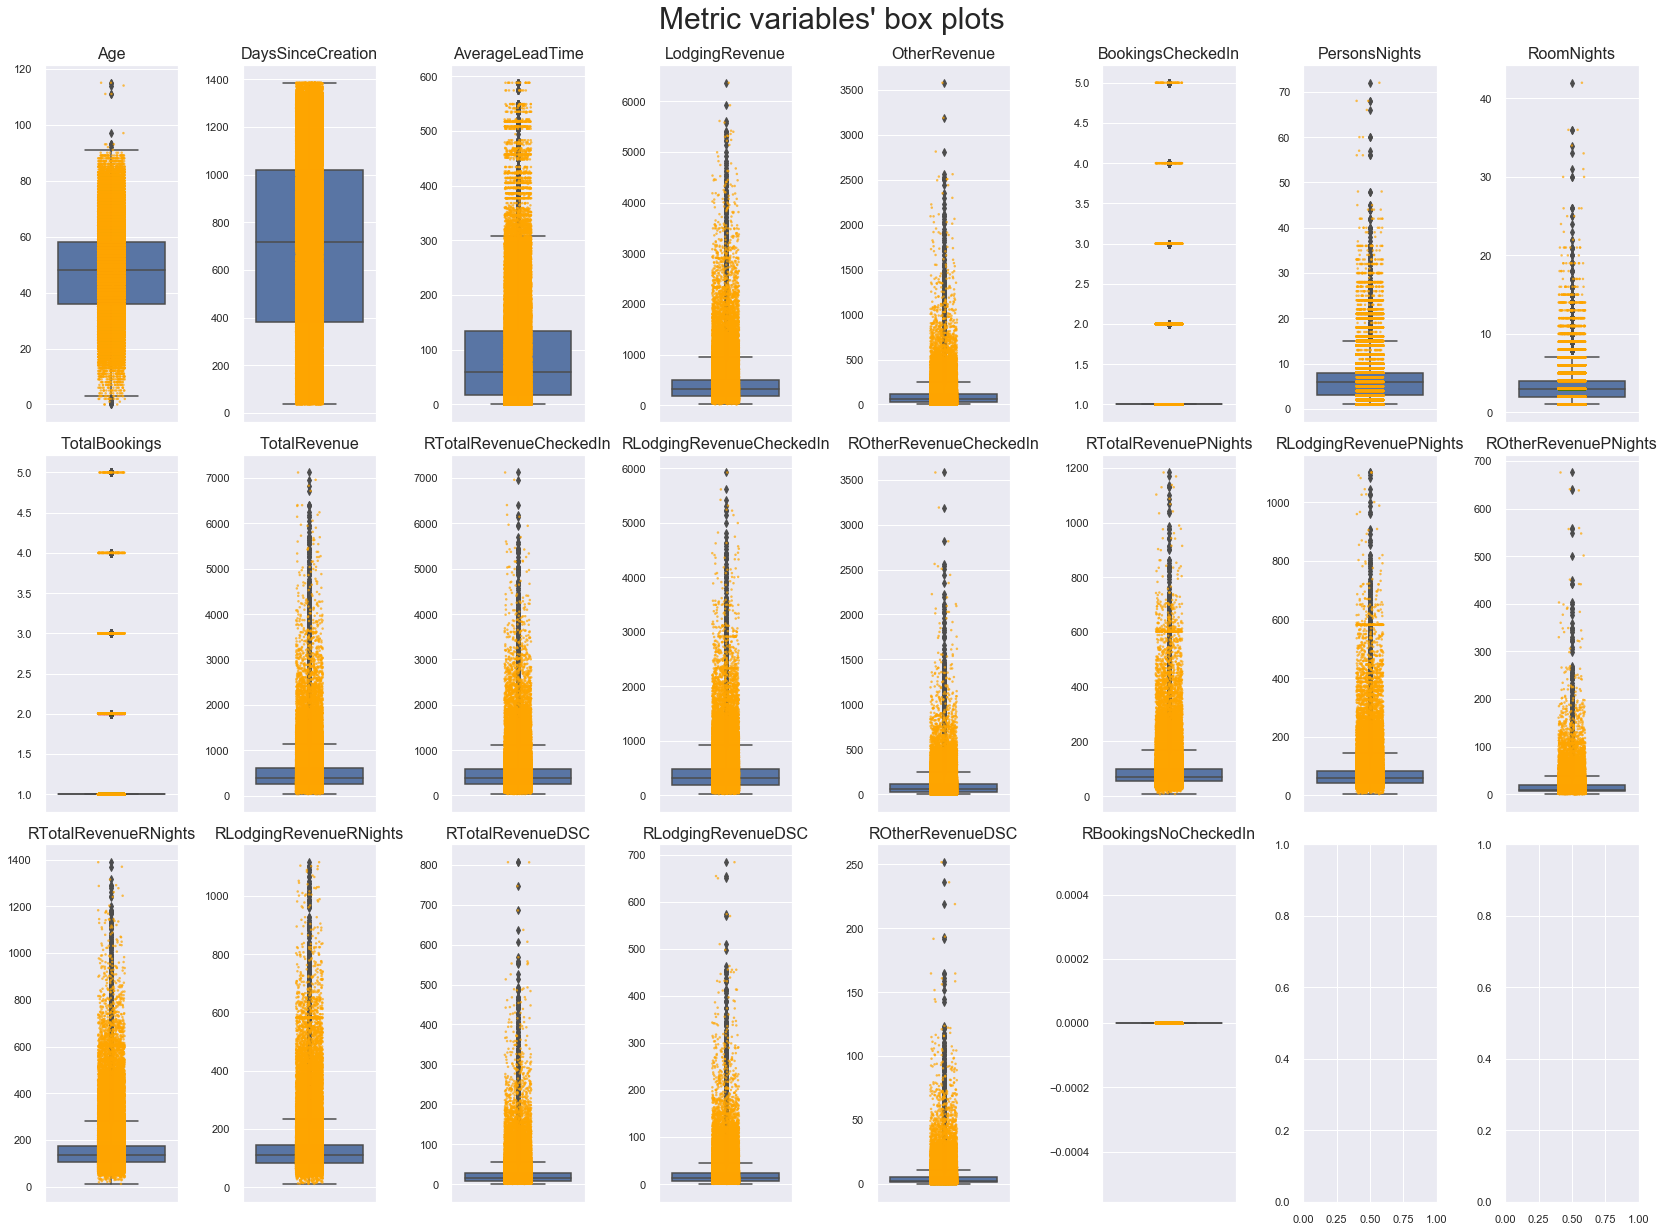

In [85]:
sns.set()

# Features to plot
plot_df = gb_df.loc[:, ~gb_df.columns.str.contains("SR")].select_dtypes(include="number").drop(["ID"], axis=1)

# Prepare figure
fig, axes = plt.subplots(3, 8, figsize=(23, 17), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, plot_df.columns):
    sns.boxplot(y=f, data=plot_df, ax=ax)
    sns.stripplot(y=f, data=plot_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax)
    ax.set_title(f, size=16) # even because of aleasing
    ax.set_ylabel("")

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

In [86]:
gb_df.drop("RBookingsNoCheckedIn", axis=1, inplace=True)

## Feature Selection

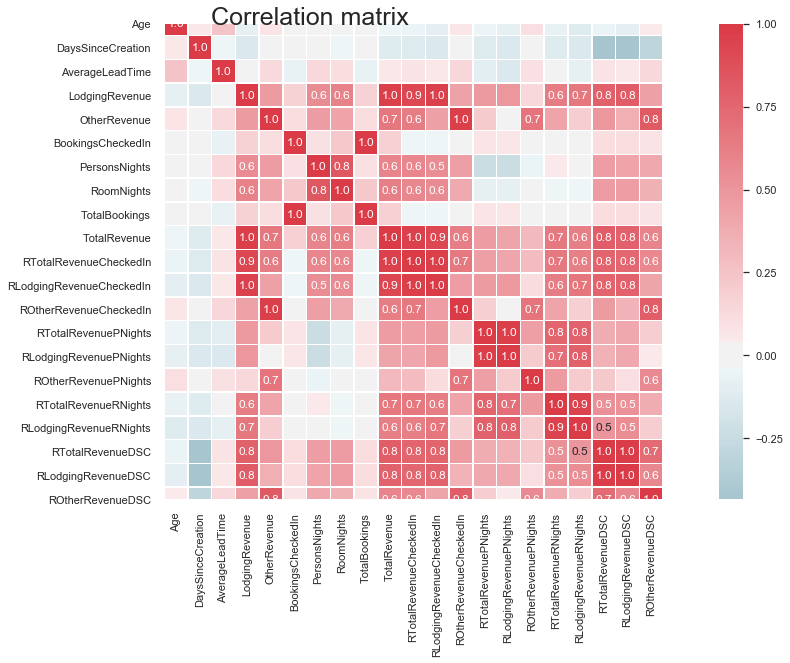

In [87]:
sns.set(style="white")

# Compute the correlation matrix
corr = gb_df.loc[:, ~gb_df.columns.str.contains("SR")].select_dtypes(include="number").drop("ID",1).corr() #Getting correlation of numerical variables

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
# mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = np.absolute(corr.values)>=0.50 # Annotate correlations above abs(0.7)
annot_arr = np.where(mask_annot, corr.values.round(1), np.full(corr.shape,""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, annot=annot_arr, fmt="s", ax=ax)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=25)
plt.yticks(rotation=0)
# # Fixing the bug of partially cut-off bottom and top cells
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

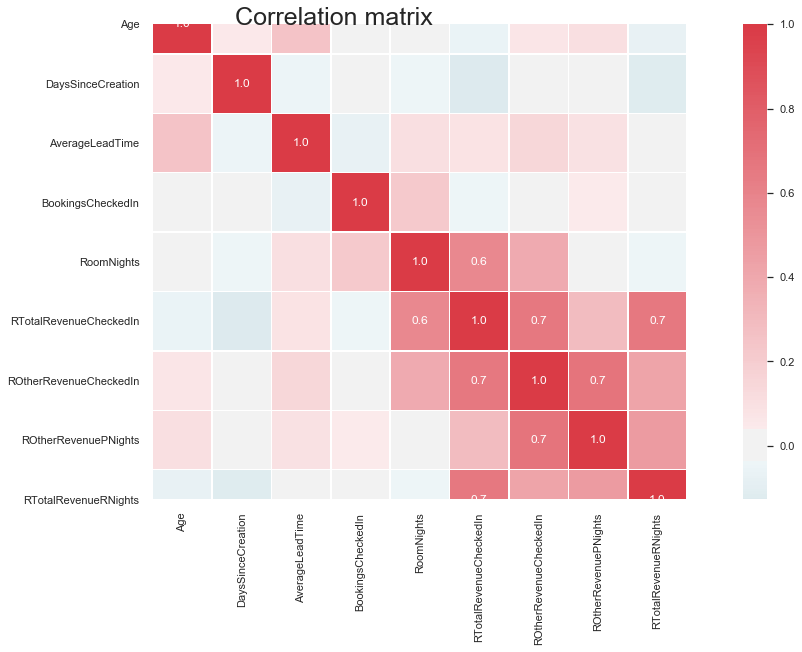

In [88]:
sns.set(style="white")

# Compute the correlation matrix
uncorr_df = gb_df.loc[:, ~gb_df.columns.str.contains("SR")].select_dtypes(include="number").drop(["ID", "LodgingRevenue", "OtherRevenue", "TotalBookings", "PersonsNights", 
                                                                                                  "TotalRevenue", "RLodgingRevenueCheckedIn", "RLodgingRevenuePNights", 
                                                                                                  "RLodgingRevenueRNights", "RTotalRevenueDSC", "RLodgingRevenueDSC",
                                                                                                  "ROtherRevenueDSC", "RTotalRevenuePNights"], 1)
corr = uncorr_df.corr() #Getting correlation of numerical variables

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
# mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Pass 2D Numpy array to annot parameter
mask_annot = np.absolute(corr.values)>=0.50 # Annotate correlations above abs(0.7)
annot_arr = np.where(mask_annot, corr.values.round(1), np.full(corr.shape,""))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, annot=annot_arr, fmt="s", ax=ax)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=25)
plt.yticks(rotation=0)
# # Fixing the bug of partially cut-off bottom and top cells
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [89]:
# df we will be using here forth
df_clean = gb_df.loc[:, ["ID", "NNationality", "DistributionChannel"] + uncorr_df.columns.to_list() + gb_df.columns[gb_df.columns.str.contains("NSR")].to_list()]
df_clean.head()

,ID,NNationality,DistributionChannel,Age,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,RoomNights,RTotalRevenueCheckedIn,ROtherRevenueCheckedIn,ROtherRevenuePNights,RTotalRevenueRNights,NSRKingSizeBed,NSRTwinBed,NSRFloor,NSRRoomLocation,NSRInRoom
0,91332,BRA,Travel Agent/Operator,51.0,205,41.0,1,5,688.16,271.50,27.150000,137.632000,1,0,0.0,0.0,0.0
1,36210,BRA,Travel Agent/Operator,73.0,767,59.0,1,1,141.00,7.00,7.000000,141.000000,0,0,0.0,0.0,0.0
2,44957,BRA,Travel Agent/Operator,29.0,622,1.0,1,4,275.78,6.50,1.625000,68.945000,1,0,0.0,0.0,0.0
3,43097,BRA,Travel Agent/Operator,31.0,653,165.0,1,6,446.25,86.25,7.187500,74.375000,1,0,0.0,0.0,0.0
4,83387,BRA,Travel Agent/Operator,60.0,292,214.0,2,3,142.00,38.50,8.555556,94.666667,1,0,0.0,0.0,0.0


## Feature Encoding

In [90]:
ohe = prep.OneHotEncoder(drop="first", sparse=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df_clean[["NNationality", "DistributionChannel"]]),
                      index=df_clean.index, columns=np.append(ohe.categories_[0][1:], ohe.categories_[1][1:]))
df_clean = df_clean.drop(["NNationality", "DistributionChannel"], axis=1).merge(ohe_df, right_index=True, left_index=True)

In [91]:
std = prep.StandardScaler()
std_vars = ["Age", "DaysSinceCreation", "AverageLeadTime", "BookingsCheckedIn", "RoomNights", 
                            "RTotalRevenueCheckedIn", "ROtherRevenueCheckedIn", "ROtherRevenuePNights", "RTotalRevenueRNights"]
std_df = pd.DataFrame(std.fit_transform(df_clean[std_vars]), index=df_clean.index, columns=map(lambda x: "std_"+x, std_vars))
df_clean = df_clean.drop(std_vars, axis=1).merge(std_df, right_index=True, left_index=True)

In [92]:
df_clean.head()

,ID,NSRKingSizeBed,NSRTwinBed,NSRFloor,NSRRoomLocation,NSRInRoom,BRA,CHE,DEU,ESP,...,Travel Agent/Operator,std_Age,std_DaysSinceCreation,std_AverageLeadTime,std_BookingsCheckedIn,std_RoomNights,std_RTotalRevenueCheckedIn,std_ROtherRevenueCheckedIn,std_ROtherRevenuePNights,std_RTotalRevenueRNights
0,91332,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.193353,-1.298634,-0.527392,-0.185989,0.999283,0.489565,1.606636,0.644638,-0.233823
1,36210,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.633641,0.193473,-0.327512,-0.185989,-1.202681,-0.841471,-0.734667,-0.470853,-0.200342
2,44957,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-1.246934,-0.191502,-0.971570,-0.185989,0.448792,-0.513602,-0.739093,-0.768410,-0.916646
3,43097,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-1.115999,-0.109197,0.849559,-0.185989,1.549775,-0.098912,-0.033162,-0.460473,-0.862666
4,83387,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.782562,-1.067650,1.393677,3.521142,-0.101699,-0.839038,-0.455835,-0.384739,-0.660945


## Missing Values

In [93]:
df_clean.isna().sum()

ID                               0
NSRKingSizeBed                   0
NSRTwinBed                       0
NSRFloor                         0
NSRRoomLocation                  0
NSRInRoom                        0
BRA                              0
CHE                              0
DEU                              0
ESP                              0
FRA                              0
GBR                              0
IRL                              0
ITA                              0
NLD                              0
PRT                              0
Rest of Europe                   0
Rest of World                    0
USA                              0
Direct                           0
GDS Systems                      0
Travel Agent/Operator            0
std_Age                       2691
std_DaysSinceCreation            0
std_AverageLeadTime              0
std_BookingsCheckedIn            0
std_RoomNights                   0
std_RTotalRevenueCheckedIn       0
std_ROtherRevenueChe

In [94]:
# Imputing Age missing values with KNN
imputer = KNNImputer(n_neighbors=10, weights="distance")
imp_data = imputer.fit_transform(df_clean.drop("ID", axis=1))
imp_df = pd.DataFrame(imp_data, index=df_clean.index, columns=df_clean.drop("ID", axis=1).columns)
df_clean = pd.concat([df_clean["ID"], imp_df], axis=1)

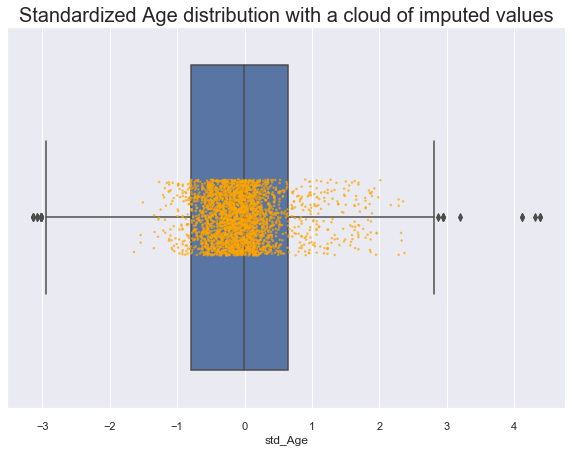

In [95]:
sns.set()

# Features to plot
ax1_df = std.fit_transform(gb_df[["Age"]])
ax2_df = df_clean["std_Age"].loc[gb_df["Age"].isna()]

# Prepare figure
fig, ax1 = plt.subplots(figsize=(10, 7), sharey=True)
    
sns.boxplot(x=ax1_df, ax=ax1)
sns.stripplot(x=ax2_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax1)

# Layout
ax1.set_title("Standardized Age distribution with a cloud of imputed values", size=20)
# ax2.set_title("Imputed Age distribution")

plt.show()

In [96]:
# We don't want to include customers with age less than 18 in our segmentation for business purposes
df_clean = df_clean.loc[std.inverse_transform(df_clean["std_Age"])>=18]

# Transforming Data

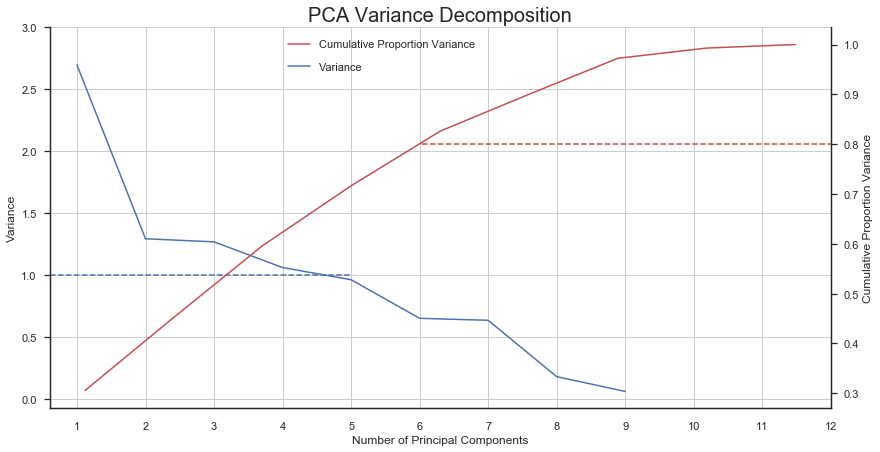

In [97]:
pca = PCA()
pca_input = df_clean.loc[:, df_clean.columns.str.contains("std")]
pca_vars = pca.fit_transform(pca_input)

sns.set_style("white")
# figure
fig, ax = plt.subplots(figsize=(14,7))

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

# data
ax.plot(np.arange(1, pca_input.shape[1]+1), pca.explained_variance_, label="Variance")
ax2.plot(np.arange(1, pca_input.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), color="r", label="Cumulative Proportion Variance")

# layout
ax.set_xticks(np.arange(1, 13))
ax.set_yticks(np.arange(3.5, step=.5))
ax.axhline(1,xmin=0, xmax=5/13, linestyle="--")
ax2.axhline(0.8, xmin=6.2/13, linestyle="--", color="r")
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.grid()
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance")
ax2.set_ylabel("Cumulative Proportion Variance")
ax.legend(loc=(0.3,0.87))
ax2.legend(loc=(0.3,0.93))
plt.title("PCA Variance Decomposition", size=20)

plt.show()

In [98]:
def highlight_nans(x):
    c1 = 'background-color: red'
    c2 = ''
    # Mask
    mask = loadings.abs()>0.49
    # DataFrame with same index and columns names as original filled empty strings
    df1 =  pd.DataFrame(c2, index=x.index, columns=x.columns)
    # Modify values of df1 column by boolean mask
    df1[mask] = c1
    return df1

pca_output = pd.DataFrame(pca_vars[:, :5], index=pca_input.index, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
loadings = pd.concat([pca_output, pca_input], axis=1).corr().iloc[5:, :5].round(3)
loadings.style.apply(highlight_nans, axis=None)

,PC1,PC2,PC3,PC4,PC5
std_Age,0.086,-0.142,0.71,0.176,0.22
std_DaysSinceCreation,-0.139,-0.074,0.163,0.677,-0.662
std_AverageLeadTime,0.186,-0.026,0.78,-0.252,0.103
std_BookingsCheckedIn,0.048,0.498,-0.093,0.607,0.577
std_RoomNights,0.477,0.804,0.141,-0.054,-0.195
std_RTotalRevenueCheckedIn,0.866,0.23,-0.125,-0.196,-0.188
std_ROtherRevenueCheckedIn,0.879,-0.074,0.093,0.086,-0.132
std_ROtherRevenuePNights,0.682,-0.474,0.027,0.305,0.162
std_RTotalRevenueRNights,0.698,-0.311,-0.352,0.009,0.144


In [99]:
# Adding to df_clean standardized Principal Components
pca_labels = ["PCFrequency", "PCRevenue", "PCYoungNoLead", "PCNoCheckedIn", "PCRecent"]
std = prep.StandardScaler()
df_clean = pd.concat([df_clean, pd.DataFrame(std.fit_transform(pca_output), index=pca_output.index, columns=map(lambda x: "std_" + x, pca_labels))], axis=1)
df_clean["std_PCRevenue"] = df_clean["std_PCRevenue"] * -1 # invert PC meaning

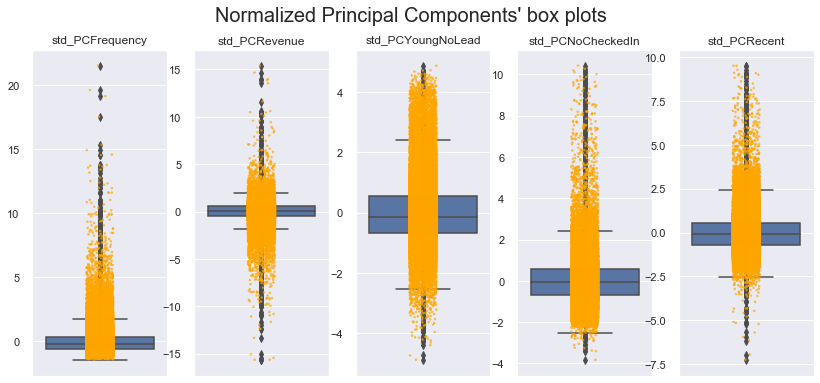

In [100]:
sns.set()

# Features to plot
plot_df = df_clean[["std_PCFrequency", "std_PCRevenue", "std_PCYoungNoLead", "std_PCNoCheckedIn", "std_PCRecent"]]

# Prepare figure
fig, axes = plt.subplots(1, 5, figsize=(14, 6))
    
# Plot data
for ax, f in zip(axes.flat, plot_df.columns):
    sns.boxplot(y=f, data=plot_df, ax=ax)
    sns.stripplot(y=f, data=plot_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax)
    ax.set_title(f, size=12) # even because of aleasing
    ax.set_ylabel("")

# Layout
plt.suptitle("Normalized Principal Components' box plots", fontsize=20)

plt.show()

## Clustering

In [101]:
def kelbowplots(clus_estim, data):
    """
    This function produces the k-elbow plot for a given clustering estimator according to 3 different clustering quality measures: "Distortion", "Silhouette" and "Calinski Harabasz".
    """
    sns.set()
    fig, axes = plt.subplots(1, 3, figsize=(20,7))

    # Plot the data
    metrics = ["distortion", "silhouette", "calinski_harabasz"]
    ylabels = ["Distortion measure", "Silhouette measure", "Calinski Harabasz measure"]
    titles = ["Distortion measure plot", "Silhouette measure plot", "Calinski Harabasz measure plot"]
    for ax, m, yl, tl in zip(axes.flatten(), metrics, ylabels, titles):
        # KElbowVisualizer produces the elbow plot for several quality measures
        KElbowVisualizer(clus_estim, metric=m, timings=False, locate_elbow=False, ax=ax).fit(data)
        ax.invert_xaxis()
        ax.set_ylabel(yl, fontsize=13)
        ax.set_xlabel("Number of clusters", fontsize=13)
        ax.set_title(tl, fontsize=13)

    # Set figure
    plt.suptitle("K-Elbow Plots", fontsize=23)

    plt.show()

In [102]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [103]:
df_clus = df_clean[['std_PCFrequency', 'std_PCRevenue', 'std_PCYoungNoLead', 'std_PCNoCheckedIn', 'std_PCRecent', 'NSRKingSizeBed', 'NSRTwinBed', 'NSRFloor', 'NSRRoomLocation',
                    'NSRInRoom', 'BRA', 'CHE', 'DEU', 'ESP', 'FRA', 'GBR', 'IRL', 'ITA', 'NLD', 'PRT', 'Rest of Europe', 'Rest of World', 'USA', 'Direct', 'GDS Systems', 
                    'Travel Agent/Operator']]

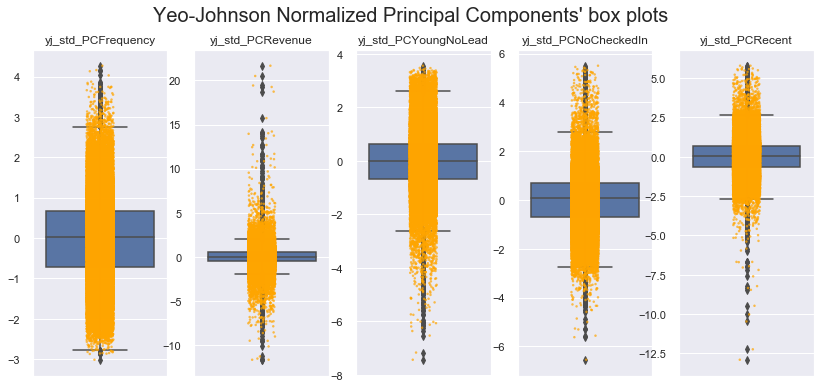

In [104]:
sns.set()

# Yeo-Johnson Transformation
pc_vars = ['std_PCFrequency', 'std_PCRevenue', 'std_PCYoungNoLead', 'std_PCNoCheckedIn', 'std_PCRecent']
data = df_clus[pc_vars]
yj = prep.PowerTransformer(method='yeo-johnson')
X_trans_yj = yj.fit_transform(data)

# Creating DataFrame
trans_df = pd.DataFrame(X_trans_yj, columns=map(lambda x: "yj_" + x, data.columns.to_list()), index=data.index)

# Prepare figure
fig, axes = plt.subplots(1, 5, figsize=(14, 6))
    
# Plot data
for ax, f in zip(axes.flat, trans_df.columns):
    sns.boxplot(y=f, data=trans_df, ax=ax)
    sns.stripplot(y=f, data=trans_df, jitter=True, size=2.5, alpha=0.7, color="orange", ax=ax)
    ax.set_title(f, size=12) # even because of aleasing
    ax.set_ylabel("")

# Layout
plt.suptitle("Yeo-Johnson Normalized Principal Components' box plots", fontsize=20)

plt.show()

In [105]:
# Df for clustering
df_clus1 = pd.concat([df_clus.drop(pc_vars, axis=1), trans_df], axis=1)
kmeans = MiniBatchKMeans(random_state=0) # Minin Batch Kmeans for performance purposes
kmeans_label1 = pd.Series(kmeans.fit_predict(df_clus1), index=df_clus1.index, name="kmeans_label1")

In [106]:
df_clus1 = pd.concat([df_clus1, kmeans_label1], axis=1)
df_clus1.groupby(by="kmeans_label1").mean().transpose()

kmeans_label1,0,1,2,3,4,5,6,7
NSRKingSizeBed,0.305740,0.327724,0.332391,0.386428,0.376580,0.409844,0.321030,0.409148
NSRTwinBed,0.104414,0.124897,0.248653,0.118843,0.112774,0.165362,0.172434,0.126535
NSRFloor,0.037770,0.042330,0.032948,0.049948,0.044578,0.043120,0.039408,0.066560
NSRRoomLocation,0.058357,0.068656,0.083120,0.112918,0.092149,0.102512,0.096117,0.120840
NSRInRoom,0.009334,0.012714,0.005388,0.012814,0.015303,0.029696,0.015571,0.027051
BRA,0.026169,0.035300,0.024203,0.027695,0.081836,0.026340,0.022299,0.051433
CHE,0.020673,0.026849,0.020758,0.028729,0.013972,0.027357,0.023068,0.024737
DEU,0.065946,0.089971,0.327180,0.132759,0.067532,0.112377,0.076317,0.151272
ESP,0.077809,0.080248,0.022790,0.060489,0.056221,0.047798,0.072472,0.034704
FRA,0.136340,0.139331,0.092395,0.213986,0.082834,0.149903,0.167820,0.158925


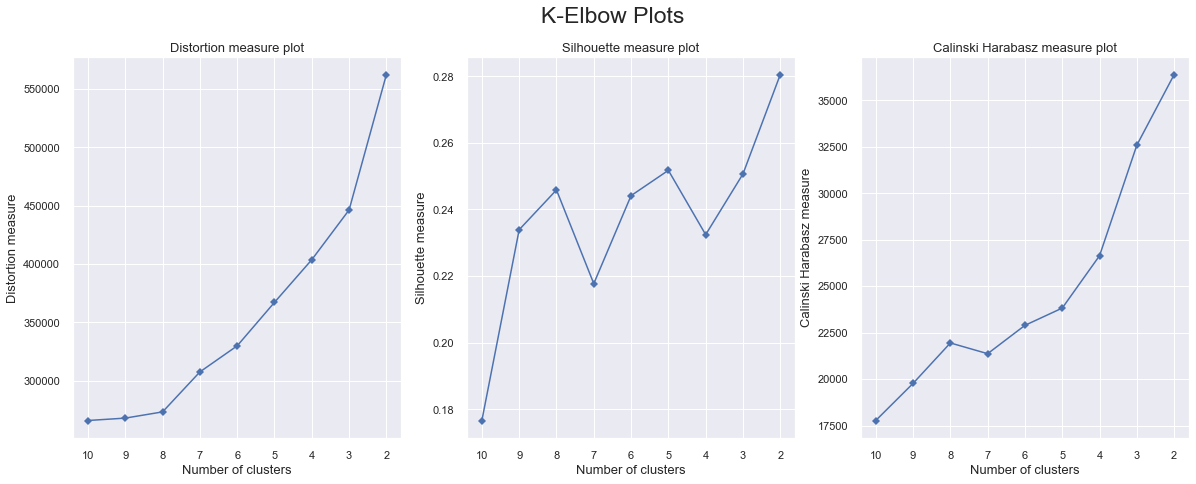

In [107]:
# Choosing the best K #LONG RUNTIME! 
kmeans = MiniBatchKMeans(random_state=0)
kelbowplots(kmeans, df_clus1)

In [108]:
sns.set()

# Data
    
# Prepare figure
fig, axes = plt.subplots(df_clus1["kmeans_label1"].unique().shape[0], 5, figsize=(23, 17), constrained_layout=True)
    
# Plot data
for cluster in np.arange(df_clus1["kmeans_label1"].unique().shape[0])
    plot_df = df_clus1.loc[df_clus1["kmeans_label1"]==0, df_clus1.columns.str.contains("yj_")]

    for ax, f in zip(axes.flat, plot_df.columns):
        sns.boxplot(y=f, data=plot_df, ax=ax)
        ax.set_title(f, size=16) # even because of aleasing
        ax.set_ylabel("")

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

SyntaxError: invalid syntax (<ipython-input-108-a26df8b5a33d>, line 9)